#  Final Project
# Spotify Recommender System

In [2]:
#So now we would like to exploration the dataset that we have
from IPython.display import Image
Image(url= "spotify.gif", width=500,
    height=500)

In [3]:
import pandas as pd

In [4]:
'''df = pd.read_csv('kpop_playlist.csv')
df['genres'] = 'K-pop'

df1 = pd.read_csv('pop_playlist.csv')
df1['genres'] = 'Pop'

df2 = pd.read_csv('rock_playlist.csv')
df2['genres'] = 'Rock'

df3 = pd.read_csv('soft_rock_playlist.csv')
df3['genres'] = 'Soft Rock'

df4 = pd.read_csv('jazz_playlist.csv')
df4['genres'] = 'Jazz'

df5 = pd.read_csv('indienesia_playlist.csv')
df5['genres'] = 'Indie'

df6 = pd.read_csv('pop_indonesia_playlist.csv')
df6['genres'] = 'Pop Indonesia'

df7 = pd.read_csv('dance_playlist.csv')
df7['genres'] = 'Dance'

df8 = pd.read_csv('rap_playlist.csv')
df8['genres'] = 'Hip hop'

df9 = pd.read_csv('kpop_hiphop.csv')
df9['genres'] = 'K-Hip hop'

df10 = pd.read_csv('classical_playlist.csv')
df10['genres'] = 'Classical'

df11 = pd.read_csv('country_music_playlist.csv')
df11['genres'] = 'Country Music'

datas = df.append([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11])

datas.to_csv('the_real_final_spotify.csv')'''

"df = pd.read_csv('kpop_playlist.csv')\ndf['genres'] = 'K-pop'\n\ndf1 = pd.read_csv('pop_playlist.csv')\ndf1['genres'] = 'Pop'\n\ndf2 = pd.read_csv('rock_playlist.csv')\ndf2['genres'] = 'Rock'\n\ndf3 = pd.read_csv('soft_rock_playlist.csv')\ndf3['genres'] = 'Soft Rock'\n\ndf4 = pd.read_csv('jazz_playlist.csv')\ndf4['genres'] = 'Jazz'\n\ndf5 = pd.read_csv('indienesia_playlist.csv')\ndf5['genres'] = 'Indie'\n\ndf6 = pd.read_csv('pop_indonesia_playlist.csv')\ndf6['genres'] = 'Pop Indonesia'\n\ndf7 = pd.read_csv('dance_playlist.csv')\ndf7['genres'] = 'Dance'\n\ndf8 = pd.read_csv('rap_playlist.csv')\ndf8['genres'] = 'Hip hop'\n\ndf9 = pd.read_csv('kpop_hiphop.csv')\ndf9['genres'] = 'K-Hip hop'\n\ndf10 = pd.read_csv('classical_playlist.csv')\ndf10['genres'] = 'Classical'\n\ndf11 = pd.read_csv('country_music_playlist.csv')\ndf11['genres'] = 'Country Music'\n\ndatas = df.append([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11])\n\ndatas.to_csv('the_real_final_spotify.csv')"

# Clustering

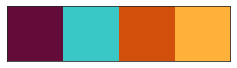

In [5]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

import numpy as np
import os
import pandas as pd
# To make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import seaborn as sns
#set style of plots
sns.set_style('white')

#define a custom palette
customPalette = ['#630C3A', '#39C8C6', '#D3500C', '#FFB139']
sns.set_palette(customPalette)
sns.palplot(customPalette)


# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore")

In [6]:
df = pd.read_csv('the_real_final_spotify.csv')

In [7]:
df.isna().sum()

Unnamed: 0          0
artist_name         0
track_name          0
track_id            0
popularity          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
type                0
uri                 0
track_href          0
analysis_url        0
duration_ms         0
time_signature      0
genres              0
dtype: int64

In [8]:
df.dropna(axis=0, inplace=True)

In [9]:
df.isna().sum()

Unnamed: 0          0
artist_name         0
track_name          0
track_id            0
popularity          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
type                0
uri                 0
track_href          0
analysis_url        0
duration_ms         0
time_signature      0
genres              0
dtype: int64

In [10]:
audio_cols = ['acousticness', 'danceability', 'instrumentalness', 'liveness', 'speechiness', 'loudness', 'valence', 'tempo']

In [11]:
df = df.reset_index()
df = df.drop(['index'], axis=1)
df[audio_cols] 

acousticness  danceability  instrumentalness  liveness  speechiness  \
0          0.16100         0.831          0.000061    0.1520       0.2180   
1          0.00323         0.759          0.000000    0.0906       0.0948   
2          0.08990         0.808          0.000000    0.0816       0.0729   
3          0.22300         0.765          0.000000    0.0963       0.1950   
4          0.01120         0.746          0.000000    0.0936       0.0993   
...            ...           ...               ...       ...          ...   
9164       0.02020         0.593          0.000000    0.2700       0.0286   
9165       0.05670         0.475          0.000049    0.7280       0.0673   
9166       0.09570         0.740          0.000005    0.0610       0.0702   
9167       0.77300         0.366          0.000111    0.3090       0.0331   
9168       0.02070         0.585          0.068700    0.1220       0.0358   

      loudness  valence    tempo  
0       -9.998    0.396  140.026  
1       -5.187    0.695  109.997  
2       -2.179    0.922  120.044  
3       -5.556    0.189   96.991  
4       -4.410    0.737  114.044  
...        ...      ...      ...  
9164    -6.804    0.280  100.900  
9165    -4.648    0.391  120.506  
9166    -9.113    0.435  131.903  
9167   -14.851    0.399  143.820  
9168   -12.343    0.451  127.445  

[9169 rows x 8 columns]

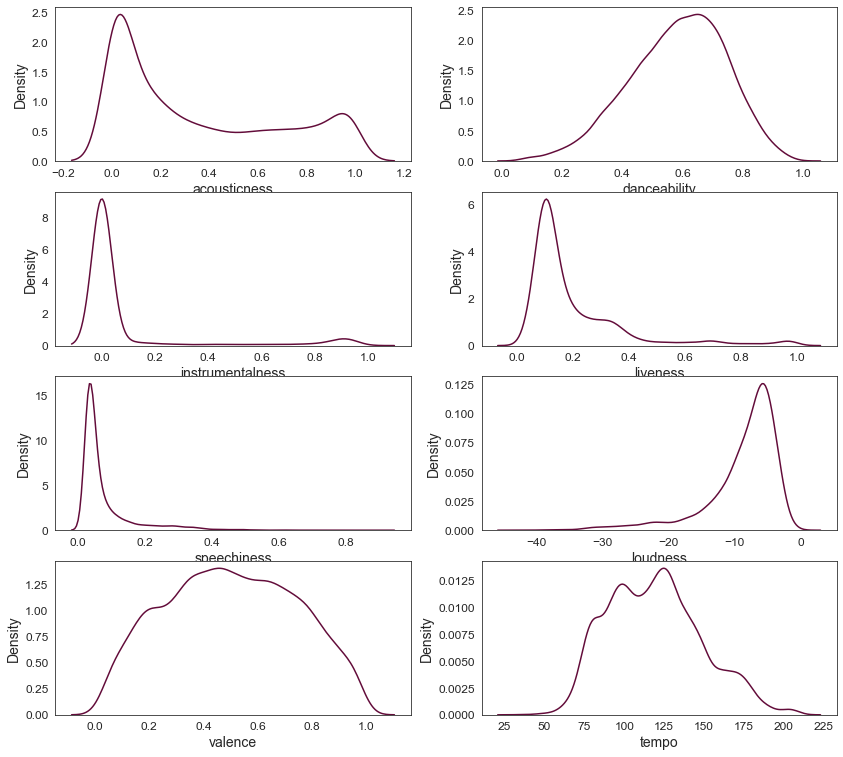

In [12]:
#figure it out
plt.figure(figsize=(14,30))
for i, col in enumerate(df[audio_cols]):
    ax = plt.subplot(9, 2, i+1)
    sns.kdeplot(df[audio_cols][col], ax=ax)
plt.show()

In [13]:
# to describe numerical features we can use describe()
df[audio_cols].describe()

acousticness  danceability  instrumentalness     liveness  speechiness  \
count   9169.000000   9169.000000       9169.000000  9169.000000  9169.000000   
mean       0.349242      0.583497          0.079026     0.199518     0.078142   
std        0.339036      0.159493          0.231314     0.178493     0.082315   
min        0.000008      0.064200          0.000000     0.018800     0.022700   
25%        0.042800      0.477000          0.000000     0.097100     0.034200   
50%        0.217000      0.596000          0.000004     0.128000     0.045600   
75%        0.647000      0.700000          0.001010     0.239000     0.080200   
max        0.996000      0.980000          0.986000     0.996000     0.905000   

          loudness      valence        tempo  
count  9169.000000  9169.000000  9169.000000  
mean     -8.707018     0.502893   119.040015  
std       5.594647     0.238063    29.224617  
min     -43.139000     0.030200    34.765000  
25%     -10.340000     0.319000    96.531000  
50%      -7.092000     0.499000   118.123000  
75%      -5.146000     0.692000   138.008000  
max       0.352000     0.988000   208.918000

In [14]:
songs = df[audio_cols]
cols = ['acousticness', 'danceability', 'instrumentalness', 'liveness',
       'speechiness', 'valence', 'tempo']

for col in songs[cols]:
    songs[col] = np.log(1 + songs[col])

In [15]:
songs

acousticness  danceability  instrumentalness  liveness  speechiness  \
0         0.149282      0.604862          0.000061  0.141500     0.197210   
1         0.003225      0.564745          0.000000  0.086728     0.090572   
2         0.086086      0.592221          0.000000  0.078441     0.070365   
3         0.201307      0.568151          0.000000  0.091941     0.178146   
4         0.011138      0.557327          0.000000  0.089475     0.094674   
...            ...           ...               ...       ...          ...   
9164      0.019999      0.465619          0.000000  0.239017     0.028199   
9165      0.055151      0.388658          0.000049  0.546965     0.065132   
9166      0.091393      0.553885          0.000005  0.059212     0.067846   
9167      0.572673      0.311887          0.000111  0.269263     0.032564   
9168      0.020489      0.460584          0.066443  0.115113     0.035174   

      loudness   valence     tempo  
0       -9.998  0.333611  4.948944  
1       -5.187  0.527683  4.709503  
2       -2.179  0.653366  4.796154  
3       -5.556  0.173113  4.584876  
4       -4.410  0.552159  4.745315  
...        ...       ...       ...  
9164    -6.804  0.246860  4.623992  
9165    -4.648  0.330023  4.799964  
9166    -9.113  0.361165  4.889620  
9167   -14.851  0.335758  4.975492  
9168   -12.343  0.372253  4.855501  

[9169 rows x 8 columns]

array([[<AxesSubplot:title={'center':'acousticness'}>,
        <AxesSubplot:title={'center':'danceability'}>,
        <AxesSubplot:title={'center':'instrumentalness'}>],
       [<AxesSubplot:title={'center':'liveness'}>,
        <AxesSubplot:title={'center':'speechiness'}>,
        <AxesSubplot:title={'center':'loudness'}>],
       [<AxesSubplot:title={'center':'valence'}>,
        <AxesSubplot:title={'center':'tempo'}>, <AxesSubplot:>]],
      dtype=object)

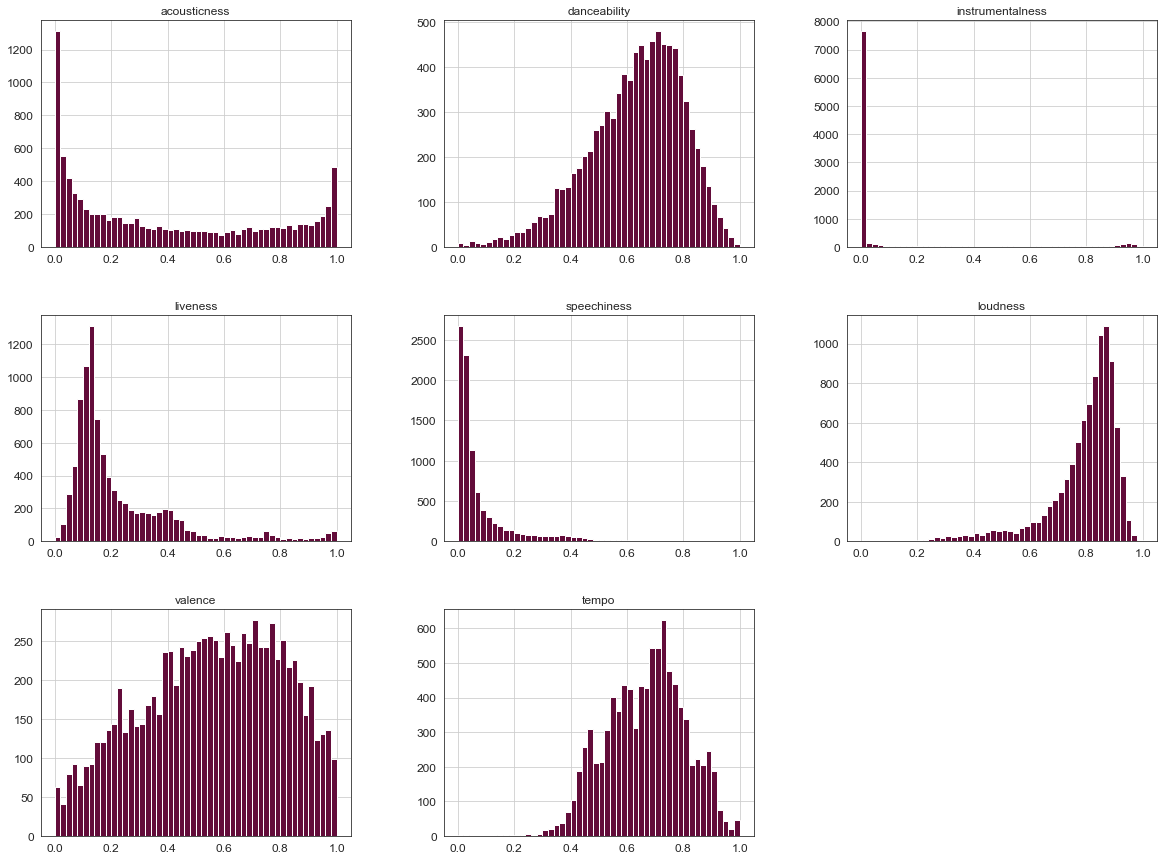

In [16]:
# Loudness feature is from -60db to 0 so we will normalise this column between 0 and 1
# Tempo feature is in BPM so we will scale between 0 and 1 too
from sklearn import preprocessing
col = ['acousticness', 'danceability', 'instrumentalness', 'liveness',
       'speechiness', 'valence', 'tempo', 'loudness']

min_max_scaler = preprocessing.MinMaxScaler()
loudness_scaled = min_max_scaler.fit_transform(songs[col])
songs[col] = pd.DataFrame(loudness_scaled)


songs.hist(bins=50,figsize=(20,15))

In [17]:
songs

acousticness  danceability  instrumentalness  liveness  speechiness  \
0         0.215983      0.873993          0.000089  0.182707     0.280955   
1         0.004655      0.809379          0.000000  0.101265     0.109520   
2         0.124546      0.853633          0.000000  0.088943     0.077036   
3         0.291258      0.814864          0.000000  0.109016     0.250307   
4         0.016104      0.797432          0.000000  0.105349     0.116115   
...            ...           ...               ...       ...          ...   
9164      0.028925      0.649723          0.000000  0.327710     0.009248   
9165      0.079786      0.525767          0.000071  0.785611     0.068623   
9166      0.132225      0.791887          0.000007  0.060350     0.072985   
9167      0.828584      0.402116          0.000162  0.372685     0.016266   
9168      0.029634      0.641614          0.096838  0.143471     0.020462   

      loudness   valence     tempo  
0     0.762020  0.462229  0.775238  
1     0.872640  0.757450  0.639941  
2     0.941804  0.948640  0.688903  
3     0.864156  0.218079  0.569520  
4     0.890506  0.794684  0.660176  
...        ...       ...       ...  
9164  0.835460  0.330263  0.591622  
9165  0.885034  0.456770  0.691056  
9166  0.782369  0.504143  0.741716  
9167  0.650433  0.465494  0.790238  
9168  0.708101  0.521011  0.722437  

[9169 rows x 8 columns]

In [18]:
# remove song names, artist and id before clustering
songs_features = songs.copy()

In [19]:
from sklearn.cluster import KMeans

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(songs_features)
    Sum_of_squared_distances.append(km.inertia_)

In [20]:
from sklearn.metrics import silhouette_score
for n_clusters in range(2,15):
    clusterer = KMeans (n_clusters=n_clusters)
    preds = clusterer.fit_predict(songs_features)
    centers = clusterer.cluster_centers_

    score = silhouette_score(songs_features, preds, metric='euclidean')
    print ("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.346827979256158)
For n_clusters = 3, silhouette score is 0.3321847375617849)
For n_clusters = 4, silhouette score is 0.2376206497300615)
For n_clusters = 5, silhouette score is 0.2502830235865815)
For n_clusters = 6, silhouette score is 0.23166094333413947)
For n_clusters = 7, silhouette score is 0.23729066897744164)
For n_clusters = 8, silhouette score is 0.22371848338545763)
For n_clusters = 9, silhouette score is 0.22106141022965697)
For n_clusters = 10, silhouette score is 0.18749587673655121)
For n_clusters = 11, silhouette score is 0.207415573346697)
For n_clusters = 12, silhouette score is 0.19755586677673623)
For n_clusters = 13, silhouette score is 0.18977874668458167)
For n_clusters = 14, silhouette score is 0.18347721553534646)


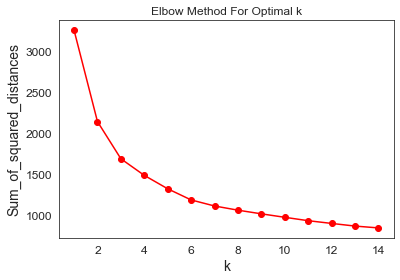

In [21]:
plt.plot(K, Sum_of_squared_distances, 'ro-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [22]:
#clustering
kmeans = KMeans(n_clusters=5)
kmeans.fit(songs_features)

KMeans(n_clusters=5)

In [23]:
# PCA to reduce our data to 2 dimensions for visualisation
from sklearn.decomposition import PCA
y_kmeans = kmeans.predict(songs_features)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(songs_features)

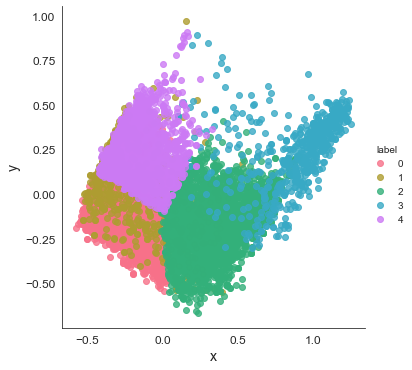

In [24]:
pc = pd.DataFrame(principal_components)
pc['label'] = y_kmeans
pc.columns = ['x', 'y','label']

#plot data with seaborn
cluster = sns.lmplot(data=pc, x='x', y='y', hue='label', 
                   fit_reg=False, legend=True, legend_out=True)


In [25]:
from sklearn.manifold import TSNE #T-Distributed Stochastic Neighbor Embedding
#T-SNE with two dimensions
tsne = TSNE(n_components=2, perplexity=50)

tsne_components = tsne.fit_transform(songs_features)

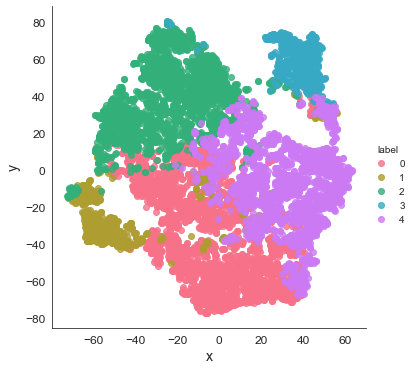

In [26]:
ts = pd.DataFrame(tsne_components)
ts['label'] = y_kmeans
ts.columns = ['x', 'y','label']

#plot data with seaborn
cluster = sns.lmplot(data=ts, x='x', y='y', hue='label', 
                   fit_reg=False, legend=True, legend_out=True)

In [27]:
pca.explained_variance_ratio_

array([0.46334498, 0.1520379 ])

# New Label

In [28]:
songs['label'] = y_kmeans

# shuffle dataset

songs = songs.sample(frac=1)
songs['label'].value_counts()

0    3062
2    2457
4    2306
3     682
1     662
Name: label, dtype: int64

In [29]:
df['label'] = y_kmeans

# shuffle dataset

df = df.sample(frac=1)
df['label'].value_counts()

0    3062
2    2457
4    2306
3     682
1     662
Name: label, dtype: int64

# Cluster 0 --> Happy

In [30]:
df[df['label'] == 0].head(100)

Unnamed: 0       artist_name  \
3415         413       Sammy Hagar   
6749         511          Flo Rida   
2736         734            Sum 41   
3198         196      Billy Squier   
467          467               EXO   
...          ...               ...   
3525         523  Rick Springfield   
8716         347          Parmalee   
848          848            YUKIKA   
5044          42              Naif   
186          186             TWICE   

                                             track_name  \
3415                              Rock 'N' Roll Weekend   
6749                                       Good Feeling   
2736                                            Fat Lip   
3198  Rock Me Tonite - 2002 Digital Remaster / 24-Bi...   
467                                        CALL ME BABY   
...                                                 ...   
3525                                      Jessie's Girl   
8716                               I'll Bring the Music   
848                                                NEON   
5044                        Alangkah Indahnya Indonesia   
186                                            ESPRESSO   

                    track_id  popularity  danceability  energy  key  loudness  \
3415  32fyJa7mlop2S7uvaMtnst          18         0.659   0.872    9    -7.938   
6749  2LEF1A8DOZ9wRYikWgVlZ8          77         0.706   0.890    1    -4.444   
2736  4KacUpvbA3Mfo05gttTjhN          74         0.402   0.914    9    -5.215   
3198  76zNJvuD3JtuiaWH0OdrWM          28         0.485   0.618    9    -6.204   
467   6Rx0ORYPP3GH9rTvGS5Vy8          65         0.692   0.886    1    -2.519   
...                      ...         ...           ...     ...  ...       ...   
3525  1sH1EgYWUhN8KR3Nx2XYQa          22         0.726   0.850    2    -5.337   
8716  43hwmCbFGvs5kexTbIn9yq          25         0.444   0.954   11    -2.575   
848   5dF22XUGeNAR3GBhMgshgp          56         0.647   0.921    5    -4.078   
5044  4QrscDLZeJWH2brvpZwurI          27         0.703   0.681    1   -10.912   
186   61iEzLnJzBnMwumWtn0nFp          69         0.656   0.851    7    -2.972   

      mode  ...  valence    tempo            type  \
3415     1  ...    0.961  140.144  audio_features   
6749     0  ...    0.684  128.011  audio_features   
2736     1  ...    0.626  196.505  audio_features   
3198     0  ...    0.632  126.982  audio_features   
467      1  ...    0.879  100.030  audio_features   
...    ...  ...      ...      ...             ...   
3525     1  ...    0.814  131.640  audio_features   
8716     1  ...    0.694  175.937  audio_features   
848      1  ...    0.774  114.991  audio_features   
5044     0  ...    0.817  129.950  audio_features   
186      0  ...    0.752   93.208  audio_features   

                                       uri  \
3415  spotify:track:32fyJa7mlop2S7uvaMtnst   
6749  spotify:track:2LEF1A8DOZ9wRYikWgVlZ8   
2736  spotify:track:4KacUpvbA3Mfo05gttTjhN   
3198  spotify:track:76zNJvuD3JtuiaWH0OdrWM   
467   spotify:track:6Rx0ORYPP3GH9rTvGS5Vy8   
...                                    ...   
3525  spotify:track:1sH1EgYWUhN8KR3Nx2XYQa   
8716  spotify:track:43hwmCbFGvs5kexTbIn9yq   
848   spotify:track:5dF22XUGeNAR3GBhMgshgp   
5044  spotify:track:4QrscDLZeJWH2brvpZwurI   
186   spotify:track:61iEzLnJzBnMwumWtn0nFp   

                                             track_href  \
3415  https://api.spotify.com/v1/tracks/32fyJa7mlop2...   
6749  https://api.spotify.com/v1/tracks/2LEF1A8DOZ9w...   
2736  https://api.spotify.com/v1/tracks/4KacUpvbA3Mf...   
3198  https://api.spotify.com/v1/tracks/76zNJvuD3Jtu...   
467   https://api.spotify.com/v1/tracks/6Rx0ORYPP3GH...   
...                                                 ...   
3525  https://api.spotify.com/v1/tracks/1sH1EgYWUhN8...   
8716  https://api.spotify.com/v1/tracks/43hwmCbFGvs5...   
848   https://api.spotify.com/v1/tracks/5dF22XUGeNAR...   
5044  https://api.spotify.com/v1/tracks/4QrscDLZeJWH...   
186   https://api.spotify.co

In [31]:
songs[songs['label']==0].mean()

acousticness        0.179822
danceability        0.724726
instrumentalness    0.017418
liveness            0.185455
speechiness         0.096405
loudness            0.847934
valence             0.780251
tempo               0.688165
label               0.000000
dtype: float64

# Cluster 1 --> Love

In [31]:
df[df['label'] == 1].head(50)

Unnamed: 0                      artist_name  \
5854         616                          D’MASIV   
3097          95  Tom Petty and the Heartbreakers   
3716         714                        Foreigner   
8475         106                        Bob Seger   
3726         724                     Neil Diamond   
8732         363                         The Band   
3539         537                      Bad Company   
6395         157                           *NSYNC   
3416         414                       April Wine   
2038          36                          Journey   
3507         505                            Wings   
8986         617              The Doobie Brothers   
8553         184                         Bob Weir   
1814         814                    Jeremy Zucker   
3930         928                  The Moody Blues   
1592         592                       Bruno Mars   
3962         960                  The Moody Blues   
5131         129             Homicide (Indonesia)   
3799         797                     Bette Midler   
8884         515                         The Band   
3915         913                         The Fixx   
3456         454                      John Denver   
3729         727                             Asia   
12            12                            STAYC   
3187         185                      John Denver   
3956         954                        Foreigner   
3292         290                         The Band   
576          576                          NCT 127   
3868         866                     Neil Diamond   
3571         569                   REO Speedwagon   
3728         726                         The Band   
3859         857                         The Fixx   
8841         472                        Bob Dylan   
3992         990                      Rod Stewart   
9118         749             The Statler Brothers   
8128         283            Johann Sebastian Bach   
8734         365                      Eric Church   
3958         956                         The Fixx   
9138         769              The Doobie Brothers   
777          777                          EST Gee   
3702         700                Loggins & Messina   
9037         668                    Grateful Dead   
8901         532                    Grateful Dead   
8603         234                    Jamey Johnson   
8757         388                         The Band   
689          689               Tech N9ne Collabos   
3184         182                        Bob Seger   
3540         538                    Fleetwood Mac   
5096          94                       Titik Temu   
2189         187               The Rolling Stones   

                                             track_name  \
5854                                     Pergilah Kasih   
3097  So You Want To Be A Rock & Roll Star - Live At...   
3716                   Feels Like The First Time - Live   
8475                 Heavy Music - Live In Detroit/1975   
3726  Love On The Rocks - Live At Madison Square Gar...   
8732                  This Wheel's On Fire - Remastered   
3539                 Ready For Love - Live At Red Rocks   
6395                    Merry Christmas, Happy Holidays   
3416                     Rock n' Roll Is a Vicious Game   
2038                               Don't Stop Believin'   
3507                        Rock Show - Remastered 2014   
8986  Listen to the Music - Live at The Beacon Theat...   
8553                         Friend Of The Devil - Live   
1814                                           comethru   
3930                 The Voice - Live At Red Rocks/1992   
1592                                   Silk Sonic Intro   
3962      Lean On Me (Tonight) - Live At Red Rocks/1992   
5131                                Belati Kalam Profan   
3799                                    Keep on Rockin'   
8884  Don't Do It - Live At The Academy Of Music / 1971   
3915                                   Privilege - Live   
3456

In [32]:
songs[songs['label']==1].mean()

acousticness        0.275285
danceability        0.562304
instrumentalness    0.034538
liveness            0.764404
speechiness         0.101203
loudness            0.815420
valence             0.625906
tempo               0.697104
label               1.000000
dtype: float64

# Cluster 2 --> Sad

In [33]:
df[df['label'] == 2].head(100)

Unnamed: 0              artist_name  \
5615         377            Endah N Rhesa   
5602         364            Fiersa Besari   
3528         526              John Denver   
1936         936          Christian Leave   
3690         688              Neil Sedaka   
...          ...                      ...   
5541         303                      RAN   
5420         182            Teddy Adhitya   
8874         505      George Beverly Shea   
8405          36         Sturgill Simpson   
8264         419  Wolfgang Amadeus Mozart   

                                             track_name  \
5615                              When You Love Someone   
5602                                              April   
3528       Rocky Mountain Suite (Cold Nights In Canada)   
1936                                      Please Notice   
3690                                 I Must Be Dreaming   
...                                                 ...   
5541                                      Dekat Di Hati   
5420                                 In Your Wonderland   
8874                                  Old Time Religion   
8405                                        The Promise   
8264  Die Zauberflöte, K. 620, Act II: Der Hölle Rac...   

                    track_id  popularity  danceability  energy  key  loudness  \
5615  2XWsariqeTCH61B53r8yA3          61         0.496   0.246    2    -9.882   
5602  3IesVVqYxCsRCsz5OCmC7q          64         0.399   0.466    2    -8.270   
3528  6WhP0Nq9tkcSq39p6062BN          19         0.390   0.148    2   -16.569   
1936  36seMHoyXmLUNxcwzwjdF7          75         0.550   0.271    2    -8.451   
3690  2oXkbroUstVBxhRi1pj5M6          27         0.446   0.472    9    -7.574   
...                      ...         ...           ...     ...  ...       ...   
5541  0owU9W5gPsJEcwAmMjzomy          63         0.719   0.492    9    -6.848   
5420  6w0O9gshUWmVPGG4w0tr4B          55         0.698   0.544    9    -6.297   
8874  3ErX7jN7mlTgUYsod1BzV6          26         0.618   0.232    6   -10.974   
8405  6OV4CbPHRtbqrpJrbEFJfi          51         0.605   0.244   11   -10.984   
8264  5AtPvKwBkAzU5iZHzmctL6           0         0.417   0.148    5   -18.612   

      mode  ...  valence    tempo            type  \
5615     1  ...    0.230  149.977  audio_features   
5602     1  ...    0.573   79.752  audio_features   
3528     1  ...    0.186  117.897  audio_features   
1936     1  ...    0.198  111.344  audio_features   
3690     1  ...    0.556   76.891  audio_features   
...    ...  ...      ...      ...             ...   
5541     1  ...    0.644  109.958  audio_features   
5420     1  ...    0.599  145.797  audio_features   
8874     1  ...    0.728  110.432  audio_features   
8405     1  ...    0.242   79.091  audio_features   
8264     1  ...    0.146  146.969  audio_features   

                                       uri  \
5615  spotify:track:2XWsariqeTCH61B53r8yA3   
5602  spotify:track:3IesVVqYxCsRCsz5OCmC7q   
3528  spotify:track:6WhP0Nq9tkcSq39p6062BN   
1936  spotify:track:36seMHoyXmLUNxcwzwjdF7   
3690  spotify:track:2oXkbroUstVBxhRi1pj5M6   
...                                    ...   
5541  spotify:track:0owU9W5gPsJEcwAmMjzomy   
5420  spotify:track:6w0O9gshUWmVPGG4w0tr4B   
8874  spotify:track:3ErX7jN7mlTgUYsod1BzV6   
8405  spotify:track:6OV4CbPHRtbqrpJrbEFJfi   
8264  spotify:track:5AtPvKwBkAzU5iZHzmctL6   

                                             track_href  \
5615  https://api.spotify.com/v1/tracks/2XWsariqeTCH...   
5602  https://api.spotify.com/v1/tracks/3IesVVqYxCsR...   
3528  https://api.spotify.com/v1/tracks/6WhP0Nq9tkcS...   
1936  https://api.spotify.com/v1/tracks/36seMHoyXmLU...   
3690  https://api.spotify.com/v1/tracks/2oXkbroUstVB...   
...                                                 ...   
5541  https://api.spotify.com/v1/tracks/0owU9W5gPsJE...   
5420  https://api.spotify.com/v1/tracks/6w0O9gshUWmV...   
8874  https://api.spotify.com/v1/tracks/3ErX7jN7mlTg...   
840

In [34]:
songs[songs['label']==2].mean()

acousticness        0.783436
danceability        0.582142
instrumentalness    0.020029
liveness            0.187683
speechiness         0.049843
loudness            0.739014
valence             0.467922
tempo               0.634894
label               2.000000
dtype: float64

# Cluster 3 --> Fear

In [35]:
df[df['label'] == 3].head(50)

Unnamed: 0                       artist_name  \
4853         851  Art Blakey & The Jazz Messengers   
4443         441                   Oakwood Station   
5398         160                            Hindia   
8243         398           Wolfgang Amadeus Mozart   
4554         552                 Pat Metheny Group   
5899         661                    Joey Alexander   
4320         318                 Paul Moretti Trio   
7922          77             Johann Sebastian Bach   
4899         897                European Jazz Trio   
8308         463                   Frédéric Chopin   
4911         909                   Soul Food Horns   
6122         884                    Joey Alexander   
8321         476                   Frédéric Chopin   
4650         648                               Hz.   
4692         690                   Coleman Hawkins   
2180         178                          Vundabar   
8176         331           Wolfgang Amadeus Mozart   
4878         876                              Mujo   
8226         381           Wolfgang Amadeus Mozart   
8174         329           Wolfgang Amadeus Mozart   
8038         193             Johann Sebastian Bach   
8169         324           Wolfgang Amadeus Mozart   
7876          31                  Ludovico Einaudi   
4369         367                            Vendla   
4838         836                            Bonobo   
8167         322           Wolfgang Amadeus Mozart   
4779         777                            Darius   
7848           3                        Erik Satie   
8201         356           Wolfgang Amadeus Mozart   
4381         379                  Magpie Jazz Trio   
4684         682                             LESKY   
4925         923                   Thelonious Monk   
8246         401           Wolfgang Amadeus Mozart   
8288         443           Wolfgang Amadeus Mozart   
7887          42                  Ludovico Einaudi   
8333         488                   Frédéric Chopin   
4883         881                             LESKY   
8362         517                   Frédéric Chopin   
8157         312           Wolfgang Amadeus Mozart   
4033          31               Vince Guaraldi Trio   
4986         984                       Boney James   
4909         907                         Hara Noda   
8080         235             Johann Sebastian Bach   
8312         467                   Frédéric Chopin   
8248         403           Wolfgang Amadeus Mozart   
4182         180                     Charlie Haden   
7980         135             Johann Sebastian Bach   
4919         917                            Khutko   
8025         180             Johann Sebastian Bach   
8331         486                   Frédéric Chopin   

                                             track_name  \
4853                           Sleeping Dancer Sleep On   
4443                                        Blue Spaces   
5398                                     Rumah Ke Rumah   
8243  Clarinet Concerto in A Major, K. 622: III. Ron...   
4554                                    Last Train Home   
5899                                        Giant Steps   
4320                                  You Go To My Head   
7922  Christmas Oratorio, BWV 248 / Part Six - For T...   
4899                                  When Autumn Comes   
8308  Waltzes, Op. 64: No. 1, Molto vivace in D-Flat...   
4911                                          Black Tea   
6122                                      Under The Sun   
8321      Waltzes, Op. 69: No. 1, Lento in A-Flat Major   
4650                               Beyond the Oak Trees   
4692                                   Prisoner Of Love   
2180                                        Alien Blues   
8176  Requiem in D Minor, K. 626: III. Seq. 6, Lacry...   
4878                                         Space Fern   
8226  Violin Concerto No. 4 in D Major, K. 218: II. ...   
8174                           Ave verum corpus, K. 618   
8038  Orches

In [36]:
songs[songs['label']==3].mean()

acousticness        0.906562
danceability        0.449515
instrumentalness    0.868715
liveness            0.157595
speechiness         0.040988
loudness            0.521047
valence             0.296585
tempo               0.588316
label               3.000000
dtype: float64

# Cluster 4 --> Angry

In [37]:
df[df['label'] == 4].tail(50)

Unnamed: 0           artist_name  \
4533         531                Bonobo   
6815         577      The Chainsmokers   
333          333                 TWICE   
1721         721                Halsey   
7142         104               Mustard   
6359         121            Marshmello   
6837         599              Dua Lipa   
6608         370      The Chainsmokers   
5144         142  Homicide (Indonesia)   
2858         856                   AJR   
6991         753              DJ Snake   
2998         996     Temple Of The Dog   
6699         461         Ariana Grande   
5133         131  Homicide (Indonesia)   
1893         893                  P!nk   
6631         393           Leona Lewis   
5283          45        Issam Alnajjar   
1605         605   Of Monsters and Men   
6101         863     First and Forever   
6856         618           Miley Cyrus   
2488         486             James Bay   
1479         479          Harry Styles   
126          126                   BTS   
9016         647            Ted Nugent   
7671         133         Tasya Rosmala   
6833         595               Gryffin   
1163         163      Ricky Montgomery   
665          665                   BTS   
2001        1001              Flo Rida   
1925         925           Chris Brown   
2915         913           Passion Pit   
5722         484                Hindia   
2087          85          Fall Out Boy   
5765         527               Galdive   
2275         273        Arctic Monkeys   
3018          16             Bob Seger   
68            68                   BTS   
7080          42            Kanye West   
7155         117            Chief Keef   
200          200               NCT 127   
6809         571          Mariah Carey   
3821         819          Night Ranger   
266          266                   BTS   
748          748   TOMORROW X TOGETHER   
6544         306           Chris Brown   
1136         136          Taylor Swift   
6546         308                T-Pain   
7352         314              Big Sean   
2119         117          3 Doors Down   
6452         214               Ava Max   

                                            track_name  \
4533                                             Otomo   
6815                                   Who Do You Love   
333                                           CHEER UP   
1721                                 You should be sad   
7142                        Ballin' (with Roddy Ricch)   
6359                                           Silence   
6837                                        Love Again   
6608                                          Takeaway   
5144                                       Sajak Suara   
2858                                      Way Less Sad   
6991                              You Know You Like It   
2998                                     Hunger Strike   
6699                                        Break Free   
5133                                        Nekrodamus   
1893                                           So What   
6631                                     Bleeding Love   
5283                                       Hadal Ahbek   
1605                                      Little Talks   
6101                                        Give Me Up   
6856                                         Adore You   
2488                                                Us   
1479                                         Fine Line   
126                                         Black Swan   
9016                           I Just Wanna Go Hunting   
7671                                             Rapuh   
6833                   Safe With Me (with Audrey Mika)   
1163                                       Mr Loverman   
665             Love Is Not Over (Full Length Edition)   
2001                             Wild Ones (feat. Sia)   
1925                                           Forever   
2915                                        Sleepyhead   
5722   

In [38]:
songs[songs['label']==4].mean()

acousticness        0.131425
danceability        0.634345
instrumentalness    0.032937
liveness            0.198810
speechiness         0.098746
loudness            0.846417
valence             0.404388
tempo               0.688670
label               4.000000
dtype: float64

In [ ]:
0.179822, 0.724726, 0.017418, 0.185455, 0.096405, 0.847934, 0.780251, 0.688165. 0.000000 

0.131425, 0.634345, 0.032937, 0.198810, 0.098746, 0.846417, 0.404388, 0.688670, 4.000000

0.906562, 0.449515, 0.868715, 0.157595, 0.040988, 0.521047, 0.296585, 0.588316, 3.000000

0.783436, 0.582142, 0.020029, 0.187683, 0.049843, 0.739014, 0.467922, 0.634894, 2.000000

0.275285, 0.562304, 0.034538, 0.764404, 0.101203, 0.815420, 0.625906, 0.697104, 1.000000

# Analysis

In [39]:
classify = {
    4 : 'Anger',
    3 : 'Fear',
    2 : 'Sad',
    1 : 'Love',
    0 : 'Happy'
}

df['label'] = df['label'].replace(classify)

In [43]:
classify = {
    'Anger' : 0,
    'Fear' :3,
    'Love' : 4,
    'Sad' : 2,
    'Happy' : 1
}

df['label_encode'] = df['label'].replace(classify)

In [44]:
df['label']

3415    Happy
6749    Happy
5615      Sad
2261    Anger
2736    Happy
        ...  
5980      Sad
6452    Anger
7070    Happy
1482    Happy
879     Happy
Name: label, Length: 9169, dtype: object

In [45]:
df['label_encode']

3415    1
6749    1
5615    2
2261    0
2736    1
       ..
5980    2
6452    0
7070    1
1482    1
879     1
Name: label_encode, Length: 9169, dtype: int64

In [46]:
df

Unnamed: 0     artist_name             track_name  \
3415         413     Sammy Hagar  Rock 'N' Roll Weekend   
6749         511        Flo Rida           Good Feeling   
5615         377   Endah N Rhesa  When You Love Someone   
2261         259  Mumford & Sons        Little Lion Man   
2736         734          Sum 41                Fat Lip   
...          ...             ...                    ...   
5980         742           Rossa   Jangan Hilangkan Dia   
6452         214         Ava Max     My Head & My Heart   
7070          32   Sleepy Hallow                   2055   
1482         482      Bruno Mars                  Skate   
879          879              CL                  SPICY   

                    track_id  popularity  danceability  energy  key  loudness  \
3415  32fyJa7mlop2S7uvaMtnst          18         0.659   0.872    9    -7.938   
6749  2LEF1A8DOZ9wRYikWgVlZ8          77         0.706   0.890    1    -4.444   
5615  2XWsariqeTCH61B53r8yA3          61         0.496   0.246    2    -9.882   
2261  6JnufVNLIO5F5Lk4sEVLeI          71         0.517   0.481    5    -8.273   
2736  4KacUpvbA3Mfo05gttTjhN          74         0.402   0.914    9    -5.215   
...                      ...         ...           ...     ...  ...       ...   
5980  2iohTvlcBjbzJ8gddFOTqi          61         0.497   0.460    7    -5.860   
6452  1KixkQVDUHggZMU9dUobgm          82         0.614   0.934    9    -3.709   
7070  4XvcHTUfIlWfyJTRG0aqlo          87         0.829   0.512    6    -5.865   
1482  2sXf2JdbB2GlNju00kw9WE          79         0.708   0.598    5    -8.365   
879   0KGn1PDH5cqmD4B8GMVfae          62         0.477   0.707    6    -7.249   

      mode  ...    tempo            type  \
3415     1  ...  140.144  audio_features   
6749     0  ...  128.011  audio_features   
5615     1  ...  149.977  audio_features   
2261     1  ...  138.510  audio_features   
2736     1  ...  196.505  audio_features   
...    ...  ...      ...             ...   
5980     1  ...   71.018  audio_features   
6452     0  ...  116.001  audio_features   
7070     0  ...   80.511  audio_features   
1482     1  ...  112.027  audio_features   
879      0  ...  178.857  audio_features   

                                       uri  \
3415  spotify:track:32fyJa7mlop2S7uvaMtnst   
6749  spotify:track:2LEF1A8DOZ9wRYikWgVlZ8   
5615  spotify:track:2XWsariqeTCH61B53r8yA3   
2261  spotify:track:6JnufVNLIO5F5Lk4sEVLeI   
2736  spotify:track:4KacUpvbA3Mfo05gttTjhN   
...                                    ...   
5980  spotify:track:2iohTvlcBjbzJ8gddFOTqi   
6452  spotify:track:1KixkQVDUHggZMU9dUobgm   
7070  spotify:track:4XvcHTUfIlWfyJTRG0aqlo   
1482  spotify:track:2sXf2JdbB2GlNju00kw9WE   
879   spotify:track:0KGn1PDH5cqmD4B8GMVfae   

                                             track_href  \
3415  https://api.spotify.com/v1/tracks/32fyJa7mlop2...   
6749  https://api.spotify.com/v1/tracks/2LEF1A8DOZ9w...   
5615  https://api.spotify.com/v1/tracks/2XWsariqeTCH...   
2261  https://api.spotify.com/v1/tracks/6JnufVNLIO5F...   
2736  https://api.spotify.com/v1/tracks/4KacUpvbA3Mf...   
...                                                 ...   
5980  https://api.spotify.com/v1/tracks/2iohTvlcBjbz...   
6452  https://api.spotify.com/v1/tracks/1KixkQVDUHgg...   
7070  https://api.spotify.com/v1/tracks/4XvcHTUfIlWf...   
1482  https://api.spotify.com/v1/tracks/2sXf2JdbB2Gl...   
879   https://api.spotify.com/v1/tracks/0KGn1PDH5cqm...   

                                           analysis_url  duration_ms  \
3415  https://api.spotify.com/v1/audio-analysis/32fy...       188733   
6749  https://api.spotify.com/v1/audio-analysis/2LEF...       248133   
5615  https://api.spotify.com/v1/audio-analysis/2XWs...       271654   
2261  https://api.spotify.com/v1/audio-analysis/6Jnu...       246973   
2736  https://api.spotify.com/v1/audio-analysis/4Kac...       178267   
...                                                 ...          ...   
5980  https://api.spotify.com

In [47]:
df[audio_cols]

acousticness  danceability  instrumentalness  liveness  speechiness  \
3415      0.002950         0.659          0.001060    0.0821       0.0560   
6749      0.058800         0.706          0.002860    0.3060       0.0688   
5615      0.750000         0.496          0.000002    0.1320       0.0267   
2261      0.029300         0.517          0.000018    0.0903       0.0272   
2736      0.000579         0.402          0.000000    0.0650       0.1420   
...            ...           ...               ...       ...          ...   
5980      0.859000         0.497          0.000000    0.0965       0.0276   
6452      0.069700         0.614          0.000000    0.1210       0.0700   
7070      0.492000         0.829          0.000000    0.1200       0.1870   
1482      0.037000         0.708          0.000000    0.1700       0.0291   
879       0.009860         0.477          0.000070    0.3890       0.2700   

      loudness  valence    tempo  
3415    -7.938    0.961  140.144  
6749    -4.444    0.684  128.011  
5615    -9.882    0.230  149.977  
2261    -8.273    0.461  138.510  
2736    -5.215    0.626  196.505  
...        ...      ...      ...  
5980    -5.860    0.249   71.018  
6452    -3.709    0.436  116.001  
7070    -5.865    0.638   80.511  
1482    -8.365    0.698  112.027  
879     -7.249    0.720  178.857  

[9169 rows x 8 columns]

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.multiclass import unique_labels

X = df[audio_cols]
y = df['label_encode']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

rfc = RandomForestClassifier(n_estimators=300, criterion='gini')
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=300)

In [49]:
# Predicting the Test set results
y_pred = rfc.predict(X_test)

In [50]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Confusion matrix, without normalization
[[761  16   1   0   1]
 [ 12 968   6   0   2]
 [  4   7 788   0   3]
 [  4   0   4 234   0]
 [  6   2   3   0 204]]


<AxesSubplot:title={'center':'Confusion matrix for Random Forest'}, xlabel='Predicted label', ylabel='True label'>

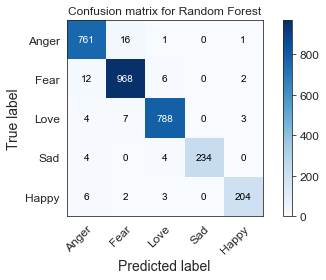

In [51]:
# Confusion matrix
definitions = ['Anger','Fear','Love','Sad', 'Happy']

# reversefactor = dict(zip(range(4),definitions))
# actual = np.vectorize(reversefactor.get)(y_test)
# pred = np.vectorize(reversefactor.get)(y_pred)
# print(pd.crosstab(actual, pred, rownames=['Actual Mood'], colnames=['Predicted Mood']))

plot_confusion_matrix(y_test, y_pred, classes=definitions,
                      title='Confusion matrix for Random Forest')

Feature: 0, Score: 0.31378
Feature: 1, Score: 0.29410
Feature: 2, Score: 0.12851
Feature: 3, Score: 0.11175
Feature: 4, Score: 0.06461
Feature: 5, Score: 0.04705
Feature: 6, Score: 0.02143
Feature: 7, Score: 0.01877


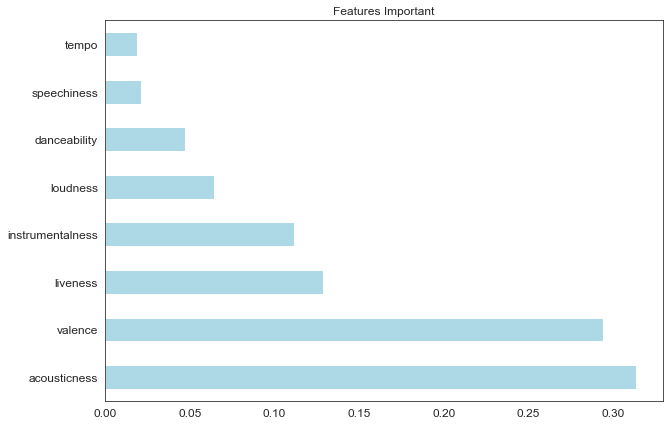

In [59]:
# define the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# fit the model
model.fit(X, y)

# get importance
# plot the 7 most important features 
plt.figure(figsize=(10,7))
importances = pd.Series(model.feature_importances_, index = X.columns).sort_values(ascending=False)
importances.nlargest(10).plot(kind='barh', color='lightblue', title="Features Important");

# summarize feature importance
for i,v in enumerate(importances):
    print('Feature: %0d, Score: %.5f' % (i,v))

In [53]:
# View a list of the features and their importance scores
features = X.columns
list(zip(df[features], rfc.feature_importances_))

[('acousticness', 0.31837806466733287),
 ('danceability', 0.04355015579211113),
 ('instrumentalness', 0.10331234982204121),
 ('liveness', 0.13063715187746014),
 ('speechiness', 0.02504282459582602),
 ('loudness', 0.06799189159936189),
 ('valence', 0.29105558483801847),
 ('tempo', 0.02003197680784832)]

In [54]:
print(classification_report(y_test,y_pred,target_names=definitions)+'forest')

              precision    recall  f1-score   support

       Anger       0.97      0.98      0.97       779
        Fear       0.97      0.98      0.98       988
        Love       0.98      0.98      0.98       802
         Sad       1.00      0.97      0.98       242
       Happy       0.97      0.95      0.96       215

    accuracy                           0.98      3026
   macro avg       0.98      0.97      0.97      3026
weighted avg       0.98      0.98      0.98      3026
forest


## Using KNN

In [77]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
# Train the model using the training sets
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [78]:
knn_pred =knn.predict(X_test)

Confusion matrix, without normalization
[[461 256  54   0   8]
 [208 699  75   1   5]
 [114 109 524  49   6]
 [ 10  12  86 134   0]
 [ 75  69  44   4  23]]


<AxesSubplot:title={'center':'Confusion matrix for KNN'}, xlabel='Predicted label', ylabel='True label'>

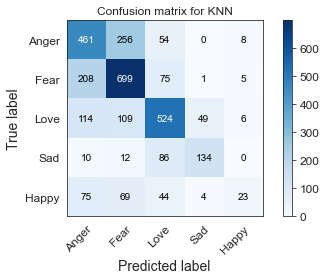

In [79]:
plot_confusion_matrix(y_test, knn_pred, classes=definitions,
                      title='Confusion matrix for KNN')

In [80]:
print(classification_report(y_test,knn_pred,target_names=definitions)+'KNN')

              precision    recall  f1-score   support

       Anger       0.53      0.59      0.56       779
        Fear       0.61      0.71      0.66       988
        Love       0.67      0.65      0.66       802
         Sad       0.71      0.55      0.62       242
       Happy       0.55      0.11      0.18       215

    accuracy                           0.61      3026
   macro avg       0.61      0.52      0.54      3026
weighted avg       0.61      0.61      0.60      3026
KNN


## Using DNN

In [61]:
import tensorflow as tf
from tensorflow import keras

In [67]:
# Create architecutre of neural network
input_ = keras.layers.Input(shape=X_train.shape[1:])
model = tf.keras.layers.Dense(32, activation='relu') (input_)
model = tf.keras.layers.BatchNormalization() (model)

model = tf.keras.layers.Dense(64, activation='relu') (model)
model = tf.keras.layers.BatchNormalization() (model)

model = tf.keras.layers.Dense(100, activation='relu') (model)
model = tf.keras.layers.BatchNormalization() (model)

dropout = tf.keras.layers.Dropout(.3) (model)

outputs = tf.keras.layers.Dense(5, activation='softmax') (dropout)

model = tf.keras.Model(inputs=input_, outputs=outputs)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 8)]               0         
_________________________________________________________________
dense_8 (Dense)              (None, 32)                288       
_________________________________________________________________
batch_normalization_3 (Batch (None, 32)                128       
_________________________________________________________________
dense_9 (Dense)              (None, 64)                2112      
_________________________________________________________________
batch_normalization_4 (Batch (None, 64)                256       
_________________________________________________________________
dense_10 (Dense)             (None, 100)               6500      
_________________________________________________________________
batch_normalization_5 (Batch (None, 100)               400   

In [69]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [71]:
history = model.fit(X_train, y_train, epochs=30)

Epoch 1/30
192/192 [==============================] - 4s 3ms/step - loss: 1.1305 - accuracy: 0.5766
Epoch 2/30
192/192 [==============================] - 1s 3ms/step - loss: 0.5226 - accuracy: 0.8060: 0s - loss: 0.693
Epoch 3/30
192/192 [==============================] - 1s 3ms/step - loss: 0.3606 - accuracy: 0.8670
Epoch 4/30
192/192 [==============================] - 1s 3ms/step - loss: 0.3112 - accuracy: 0.8779
Epoch 5/30
192/192 [==============================] - 1s 3ms/step - loss: 0.3112 - accuracy: 0.8747
Epoch 6/30
192/192 [==============================] - 1s 3ms/step - loss: 0.2793 - accuracy: 0.8893
Epoch 7/30
192/192 [==============================] - 1s 3ms/step - loss: 0.2831 - accuracy: 0.8874
Epoch 8/30
192/192 [==============================] - 1s 3ms/step - loss: 0.2847 - accuracy: 0.8857
Epoch 9/30
192/192 [==============================] - 1s 3ms/step - loss: 0.2756 - accuracy: 0.8891
Epoch 10/30
192/192 [==============================] - 1s 3ms/step - loss: 0.2529 

# Recommendation Model

In [81]:
spotify_features_df = df

In [82]:
from sklearn.preprocessing import MinMaxScaler

scaled_features = MinMaxScaler().fit_transform([
  spotify_features_df['acousticness'].values,
  spotify_features_df['danceability'].values,
  spotify_features_df['duration_ms'].values,
  spotify_features_df['energy'].values,
  spotify_features_df['instrumentalness'].values,
  spotify_features_df['liveness'].values,
  spotify_features_df['loudness'].values,
  spotify_features_df['speechiness'].values,
  spotify_features_df['tempo'].values,
  spotify_features_df['valence'].values,
  ])

In [83]:
#Storing the transformed column vectors into our dataframe
spotify_features_df[['acousticness','danceability','duration_ms','energy','instrumentalness','liveness','loudness','speechiness','tempo','valence']] = scaled_features.T

In [84]:
spotify_features_df = spotify_features_df.drop(['Unnamed: 0'], axis=1)

In [85]:
spotify_features_df = spotify_features_df.reset_index()
spotify_features_df = spotify_features_df.drop(['index'], axis=1)

In [86]:
spotify_features_df

artist_name             track_name                track_id  \
0        Sammy Hagar  Rock 'N' Roll Weekend  32fyJa7mlop2S7uvaMtnst   
1           Flo Rida           Good Feeling  2LEF1A8DOZ9wRYikWgVlZ8   
2      Endah N Rhesa  When You Love Someone  2XWsariqeTCH61B53r8yA3   
3     Mumford & Sons        Little Lion Man  6JnufVNLIO5F5Lk4sEVLeI   
4             Sum 41                Fat Lip  4KacUpvbA3Mfo05gttTjhN   
...              ...                    ...                     ...   
9164           Rossa   Jangan Hilangkan Dia  2iohTvlcBjbzJ8gddFOTqi   
9165         Ava Max     My Head & My Heart  1KixkQVDUHggZMU9dUobgm   
9166   Sleepy Hallow                   2055  4XvcHTUfIlWfyJTRG0aqlo   
9167      Bruno Mars                  Skate  2sXf2JdbB2GlNju00kw9WE   
9168              CL                  SPICY  0KGn1PDH5cqmD4B8GMVfae   

      popularity  danceability    energy  key  loudness  mode  speechiness  \
0             18      0.000046  0.000047    9       0.0     1     0.000042   
1             77      0.000021  0.000021    1       0.0     0     0.000018   
2             61      0.000038  0.000037    2       0.0     1     0.000036   
3             71      0.000036  0.000035    5       0.0     1     0.000034   
4             74      0.000032  0.000034    9       0.0     1     0.000030   
...          ...           ...       ...  ...       ...   ...          ...   
9164          61      0.000025  0.000024    7       0.0     1     0.000023   
9165          82      0.000025  0.000027    9       0.0     0     0.000022   
9166          87      0.000054  0.000051    6       0.0     0     0.000049   
9167          79      0.000045  0.000044    5       0.0     1     0.000041   
9168          62      0.000040  0.000041    6       0.0     0     0.000039   

      ...     tempo            type                                   uri  \
0     ...  0.000785  audio_features  spotify:track:32fyJa7mlop2S7uvaMtnst   
1     ...  0.000534  audio_features  spotify:track:2LEF1A8DOZ9wRYikWgVlZ8   
2     ...  0.000588  audio_features  spotify:track:2XWsariqeTCH61B53r8yA3   
3     ...  0.000594  audio_features  spotify:track:6JnufVNLIO5F5Lk4sEVLeI   
4     ...  0.001132  audio_features  spotify:track:4KacUpvbA3Mfo05gttTjhN   
...   ...       ...             ...                                   ...   
9164  ...  0.000298  audio_features  spotify:track:2iohTvlcBjbzJ8gddFOTqi   
9165  ...  0.000685  audio_features  spotify:track:1KixkQVDUHggZMU9dUobgm   
9166  ...  0.000697  audio_features  spotify:track:4XvcHTUfIlWfyJTRG0aqlo   
9167  ...  0.000593  audio_features  spotify:track:2sXf2JdbB2GlNju00kw9WE   
9168  ...  0.000956  audio_features  spotify:track:0KGn1PDH5cqmD4B8GMVfae   

                                             track_href  \
0     https://api.spotify.com/v1/tracks/32fyJa7mlop2...   
1     https://api.spotify.com/v1/tracks/2LEF1A8DOZ9w...   
2     https://api.spotify.com/v1/tracks/2XWsariqeTCH...   
3     https://api.spotify.com/v1/tracks/6JnufVNLIO5F...   
4     https://api.spotify.com/v1/tracks/4KacUpvbA3Mf...   
...                                                 ...   
9164  https://api.spotify.com/v1/tracks/2iohTvlcBjbz...   
9165  https://api.spotify.com/v1/tracks/1KixkQVDUHgg...   
9166  https://api.spotify.com/v1/tracks/4XvcHTUfIlWf...   
9167  https://api.spotify.com/v1/tracks/2sXf2JdbB2Gl...   
9168  https://api.spotify.com/v1/tracks/0KGn1PDH5cqm...   

                                           analysis_url duration_ms  \
0     https://api.spotify.com/v1/audio-analysis/32fy...         1.0   
1     https://api.spotify.com/v1/audio-analysis/2LEF...         1.0   
2     https://api.spotify.com/v1/audio-analysis/2XWs...         1.0   
3     https://api.spotify.com/v1/audio-analysis/6Jnu...         1.0   
4     https://api.spotify.com/v1/audio-analysis/4Kac...         1.0   
...                                                 ...         ...   
9164  https://api.spotify.com/v1/audio-analysis/2ioh...         1.0   
9165  https://api

In [87]:
#discarding the categorical and unnecessary features 
spotify_features_df = spotify_features_df.drop('key', axis = 1)
spotify_features_df = spotify_features_df.drop('mode', axis = 1)
spotify_features_df = spotify_features_df.drop('time_signature', axis = 1)
spotify_features_df = spotify_features_df.drop('track_id', axis = 1)
spotify_features_df = spotify_features_df.drop('type', axis = 1)
spotify_features_df = spotify_features_df.drop('analysis_url', axis = 1)
spotify_features_df = spotify_features_df.drop('duration_ms', axis = 1)
spotify_features_df = spotify_features_df.drop('track_href', axis = 1)
spotify_features_df = spotify_features_df.drop('uri', axis = 1)

In [88]:
spotify_features_df

artist_name             track_name  popularity  danceability  \
0        Sammy Hagar  Rock 'N' Roll Weekend          18      0.000046   
1           Flo Rida           Good Feeling          77      0.000021   
2      Endah N Rhesa  When You Love Someone          61      0.000038   
3     Mumford & Sons        Little Lion Man          71      0.000036   
4             Sum 41                Fat Lip          74      0.000032   
...              ...                    ...         ...           ...   
9164           Rossa   Jangan Hilangkan Dia          61      0.000025   
9165         Ava Max     My Head & My Heart          82      0.000025   
9166   Sleepy Hallow                   2055          87      0.000054   
9167      Bruno Mars                  Skate          79      0.000045   
9168              CL                  SPICY          62      0.000040   

        energy  loudness  speechiness  acousticness  instrumentalness  \
0     0.000047       0.0     0.000042      0.000042          0.000042   
1     0.000021       0.0     0.000018      0.000018          0.000018   
2     0.000037       0.0     0.000036      0.000039          0.000036   
3     0.000035       0.0     0.000034      0.000034          0.000033   
4     0.000034       0.0     0.000030      0.000029          0.000029   
...        ...       ...          ...           ...               ...   
9164  0.000024       0.0     0.000023      0.000026          0.000023   
9165  0.000027       0.0     0.000022      0.000022          0.000021   
9166  0.000051       0.0     0.000049      0.000051          0.000047   
9167  0.000044       0.0     0.000041      0.000041          0.000041   
9168  0.000041       0.0     0.000039      0.000037          0.000037   

      liveness   valence     tempo         genres  label  label_encode  
0     0.000042  0.000047  0.000785      Soft Rock  Happy             1  
1     0.000019  0.000021  0.000534          Dance  Happy             1  
2     0.000037  0.000037  0.000588  Pop Indonesia    Sad             2  
3     0.000034  0.000035  0.000594           Rock  Anger             0  
4     0.000030  0.000033  0.001132           Rock  Happy             1  
...        ...       ...       ...            ...    ...           ...  
9164  0.000023  0.000024  0.000298  Pop Indonesia    Sad             2  
9165  0.000022  0.000024  0.000685          Dance  Anger             0  
9166  0.000048  0.000052  0.000697        Hip hop  Happy             1  
9167  0.000042  0.000045  0.000593            Pop  Happy             1  
9168  0.000039  0.000041  0.000956          K-pop  Happy             1  

[9169 rows x 15 columns]

In [89]:
spotify_features_df[spotify_features_df['track_name']=='All Too Well']

artist_name    track_name  popularity  danceability    energy  \
6580  Taylor Swift  All Too Well          73      0.000026  0.000026   

      loudness  speechiness  acousticness  instrumentalness  liveness  \
6580       0.0     0.000024      0.000024          0.000024  0.000024   

       valence     tempo genres  label  label_encode  
6580  0.000025  0.000308    Pop  Anger             0

In [90]:
# Count vectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

cv = CountVectorizer()
result_cv = cv.fit_transform(spotify_features_df['artist_name'])

#artist spare matriks
#artist spare matriks
cosine_sim = cosine_similarity(result_cv, result_cv)

In [91]:
def recommend_by_artist_name(title, count):
    #get index of songs
    idx = spotify_features_df[spotify_features_df['track_name']== title].index.tolist()[0]
    artist = spotify_features_df.iloc[idx].artist_name
    
    #compute the similarity
    sim_score = list(enumerate(cosine_sim[idx]))
    sim_score = sorted(sim_score, key=lambda x: x[1], reverse=True)
    
    #get desire number of scores
    sim_score = sim_score[1:(count+1)]
    song_indices = [i[0] for i in sim_score]
    
    print(f'Here are {count} songs similar to {title} by artist {artist}:')
    return df.track_name.iloc[song_indices]

In [92]:
recommend_by_artist_name('All Too Well', 10)

Here are 10 songs similar to All Too Well by artist Taylor Swift:


1257                   Girl At Home (Taylor's Version)
1211                  The Lucky One (Taylor's Version)
1135                               Christmas Tree Farm
1035                   All Too Well (Taylor's Version)
1103    Better Man (Taylor's Version) (From The Vault)
1544                                      Shake It Off
1262                                             Lover
1649                                       Getaway Car
1182                    Begin Again (Taylor's Version)
1792             You Belong With Me (Taylor’s Version)
Name: track_name, dtype: object

In [93]:
spotify_features_df.columns

Index(['artist_name', 'track_name', 'popularity', 'danceability', 'energy',
       'loudness', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'genres', 'label', 'label_encode'],
      dtype='object')

In [94]:
def recommendation_by_song_artist(data, song, artist):
    try :
        song_and_artist_data = data[(data['track_name']== song) & (data['artist_name']== artist)]
        similar_song = data.copy()
        
        sound_properties = similar_song.loc[:,['danceability', 'energy', 'loudness',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo']]
        #calculate
        similar_song['Similar with song'] = cosine_similarity(sound_properties, sound_properties.to_numpy()
                                                              [song_and_artist_data.index[0],None]).squeeze()
        similar_song.rename(columns={'track_name': f'Similar with {song}'}, inplace=True)
        similar_song = similar_song.sort_values(by = ['Similar with song', 'popularity'], ascending=False)
        similar_song = similar_song[['artist_name', f'Similar with {song}', 'genres', 'popularity']]
        similar_song.reset_index(drop=True, inplace=True)
        
        return similar_song.iloc[1:11]
    
    except :
        print('Oops! this song is not included in dataset')

In [95]:
recommendation_by_song_artist(spotify_features_df, "The Feels", "TWICE")

artist_name   Similar with The Feels genres  popularity
1          TWICE                The Feels  K-pop          87
2          TWICE                The Feels  K-pop          75
3       MOMOLAND                     BAAM  K-pop          63
4       Monsta X         Got me in chains  K-pop          59
5   SUPER JUNIOR       쏘리 쏘리 Sorry, Sorry  K-pop          62
6            BTS                  Ma City  K-pop          59
7          Apink                Dumhdurum  K-pop          62
8    PURPLE KISS                   Zombie  K-pop          63
9     Red Velvet  러시안 룰렛 Russian Roulette  K-pop          70
10         aespa              YEPPI YEPPI  K-pop          67

In [98]:
df['track_name'].duplicated().sum()

1961

In [104]:
df['track_name'] = df['track_name'].drop_duplicates(keep='first')

In [106]:
df = df.dropna(axis=0)

In [108]:
df = df.reset_index()
df = df.drop(['index'], axis=1)


Unnamed: 0           artist_name             track_name  \
0            413           Sammy Hagar  Rock 'N' Roll Weekend   
1            511              Flo Rida           Good Feeling   
2            377         Endah N Rhesa  When You Love Someone   
3            259        Mumford & Sons        Little Lion Man   
4            734                Sum 41                Fat Lip   
...          ...                   ...                    ...   
7203         584        The Beach Boys                 Kokomo   
7204         431  The Statler Brothers   I Shall Not Be Moved   
7205         314                IZ*ONE               Panorama   
7206         742                 Rossa   Jangan Hilangkan Dia   
7207         879                    CL                  SPICY   

                    track_id  popularity  danceability    energy  key  \
0     32fyJa7mlop2S7uvaMtnst          18      0.000046  0.000047    9   
1     2LEF1A8DOZ9wRYikWgVlZ8          77      0.000021  0.000021    1   
2     2XWsariqeTCH61B53r8yA3          61      0.000038  0.000037    2   
3     6JnufVNLIO5F5Lk4sEVLeI          71      0.000036  0.000035    5   
4     4KacUpvbA3Mfo05gttTjhN          74      0.000032  0.000034    9   
...                      ...         ...           ...       ...  ...   
7203  7B22szTT8omMRmpQw6DMqV          71      0.000058  0.000057    0   
7204  7GOBbTQVs30Zxwr3pigRQy          27      0.000046  0.000047    9   
7205  0CnpSTdL9l5vQM4YnzXtyo          69      0.000008  0.000009    9   
7206  2iohTvlcBjbzJ8gddFOTqi          61      0.000025  0.000024    7   
7207  0KGn1PDH5cqmD4B8GMVfae          62      0.000040  0.000041    6   

      loudness  mode  ...     tempo            type  \
0          0.0     1  ...  0.000785  audio_features   
1          0.0     0  ...  0.000534  audio_features   
2          0.0     1  ...  0.000588  audio_features   
3          0.0     1  ...  0.000594  audio_features   
4          0.0     1  ...  0.001132  audio_features   
...        ...   ...  ...       ...             ...   
7203       0.0     1  ...  0.000585  audio_features   
7204       0.0     1  ...  0.000764  audio_features   
7205       0.0     0  ...  0.000571  audio_features   
7206       0.0     1  ...  0.000298  audio_features   
7207       0.0     0  ...  0.000956  audio_features   

                                       uri  \
0     spotify:track:32fyJa7mlop2S7uvaMtnst   
1     spotify:track:2LEF1A8DOZ9wRYikWgVlZ8   
2     spotify:track:2XWsariqeTCH61B53r8yA3   
3     spotify:track:6JnufVNLIO5F5Lk4sEVLeI   
4     spotify:track:4KacUpvbA3Mfo05gttTjhN   
...                                    ...   
7203  spotify:track:7B22szTT8omMRmpQw6DMqV   
7204  spotify:track:7GOBbTQVs30Zxwr3pigRQy   
7205  spotify:track:0CnpSTdL9l5vQM4YnzXtyo   
7206  spotify:track:2iohTvlcBjbzJ8gddFOTqi   
7207  spotify:track:0KGn1PDH5cqmD4B8GMVfae   

                                             track_href  \
0     https://api.spotify.com/v1/tracks/32fyJa7mlop2...   
1     https://api.spotify.com/v1/tracks/2LEF1A8DOZ9w...   
2     https://api.spotify.com/v1/tracks/2XWsariqeTCH...   
3     https://api.spotify.com/v1/tracks/6JnufVNLIO5F...   
4     https://api.spotify.com/v1/tracks/4KacUpvbA3Mf...   
...                                                 ...   
7203  https://api.spotify.com/v1/tracks/7B22szTT8omM...   
7204  https://api.spotify.com/v1/tracks/7GOBbTQVs30Z...   
7205  https://api.spotify.com/v1/tracks/0CnpSTdL9l5v...   
7206  https://api.spotify.com/v1/tracks/2iohTvlcBjbz...   
7207  https://api.spotify.com/v1/tracks/0KGn1PDH5cqm...   

                                           analysis_url  duration_ms  \
0     https://api.spotify.com/v1/audio-analysis/32fy...          1.0   
1     https://api.spotify.com/v1/audio-analysis/2LEF...          1.0   
2     https://api.spotify.com/v1/audio-analysis/2XWs...          1.0   
3     https://api.spotify.com/v1/audio-analysis/6Jnu...          1.0   
4     https://api.spotify.com/v1/audio-analysis/4Kac...          

In [109]:
df = df.drop(['Unnamed: 0'], axis=1)
df

artist_name             track_name                track_id  \
0              Sammy Hagar  Rock 'N' Roll Weekend  32fyJa7mlop2S7uvaMtnst   
1                 Flo Rida           Good Feeling  2LEF1A8DOZ9wRYikWgVlZ8   
2            Endah N Rhesa  When You Love Someone  2XWsariqeTCH61B53r8yA3   
3           Mumford & Sons        Little Lion Man  6JnufVNLIO5F5Lk4sEVLeI   
4                   Sum 41                Fat Lip  4KacUpvbA3Mfo05gttTjhN   
...                    ...                    ...                     ...   
7203        The Beach Boys                 Kokomo  7B22szTT8omMRmpQw6DMqV   
7204  The Statler Brothers   I Shall Not Be Moved  7GOBbTQVs30Zxwr3pigRQy   
7205                IZ*ONE               Panorama  0CnpSTdL9l5vQM4YnzXtyo   
7206                 Rossa   Jangan Hilangkan Dia  2iohTvlcBjbzJ8gddFOTqi   
7207                    CL                  SPICY  0KGn1PDH5cqmD4B8GMVfae   

      popularity  danceability    energy  key  loudness  mode  speechiness  \
0             18      0.000046  0.000047    9       0.0     1     0.000042   
1             77      0.000021  0.000021    1       0.0     0     0.000018   
2             61      0.000038  0.000037    2       0.0     1     0.000036   
3             71      0.000036  0.000035    5       0.0     1     0.000034   
4             74      0.000032  0.000034    9       0.0     1     0.000030   
...          ...           ...       ...  ...       ...   ...          ...   
7203          71      0.000058  0.000057    0       0.0     1     0.000055   
7204          27      0.000046  0.000047    9       0.0     1     0.000043   
7205          69      0.000008  0.000009    9       0.0     0     0.000005   
7206          61      0.000025  0.000024    7       0.0     1     0.000023   
7207          62      0.000040  0.000041    6       0.0     0     0.000039   

      ...     tempo            type                                   uri  \
0     ...  0.000785  audio_features  spotify:track:32fyJa7mlop2S7uvaMtnst   
1     ...  0.000534  audio_features  spotify:track:2LEF1A8DOZ9wRYikWgVlZ8   
2     ...  0.000588  audio_features  spotify:track:2XWsariqeTCH61B53r8yA3   
3     ...  0.000594  audio_features  spotify:track:6JnufVNLIO5F5Lk4sEVLeI   
4     ...  0.001132  audio_features  spotify:track:4KacUpvbA3Mfo05gttTjhN   
...   ...       ...             ...                                   ...   
7203  ...  0.000585  audio_features  spotify:track:7B22szTT8omMRmpQw6DMqV   
7204  ...  0.000764  audio_features  spotify:track:7GOBbTQVs30Zxwr3pigRQy   
7205  ...  0.000571  audio_features  spotify:track:0CnpSTdL9l5vQM4YnzXtyo   
7206  ...  0.000298  audio_features  spotify:track:2iohTvlcBjbzJ8gddFOTqi   
7207  ...  0.000956  audio_features  spotify:track:0KGn1PDH5cqmD4B8GMVfae   

                                             track_href  \
0     https://api.spotify.com/v1/tracks/32fyJa7mlop2...   
1     https://api.spotify.com/v1/tracks/2LEF1A8DOZ9w...   
2     https://api.spotify.com/v1/tracks/2XWsariqeTCH...   
3     https://api.spotify.com/v1/tracks/6JnufVNLIO5F...   
4     https://api.spotify.com/v1/tracks/4KacUpvbA3Mf...   
...                                                 ...   
7203  https://api.spotify.com/v1/tracks/7B22szTT8omM...   
7204  https://api.spotify.com/v1/tracks/7GOBbTQVs30Z...   
7205  https://api.spotify.com/v1/tracks/0CnpSTdL9l5v...   
7206  https://api.spotify.com/v1/tracks/2iohTvlcBjbz...   
7207  https://api.spotify.com/v1/tracks/0KGn1PDH5cqm...   

                                           analysis_url duration_ms  \
0     https://api.spotify.com/v1/audio-analysis/32fy...         1.0   
1     https://api.spotify.com/v1/audio-analysis/2LEF...         1.0   
2     https://api.spotify.com/v1/audio-analysis/2XWs...         1.0   
3     https://api.spotify.com/v1/audio-analysis/6Jnu...         1.0   
4     https://api.spotify.com/v1/audio-analysis/4Kac...         1.0   
...                                                 ...         ...   
7203  https://api.spot

In [44]:
df.to_csv("result_data_song.csv")

In [58]:
data = pd.read_csv("result_data_song.csv")
data

Unnamed: 0           artist_name             track_name  \
0              0           Sammy Hagar  Rock 'N' Roll Weekend   
1              1              Flo Rida           Good Feeling   
2              2         Endah N Rhesa  When You Love Someone   
3              3        Mumford & Sons        Little Lion Man   
4              4                Sum 41                Fat Lip   
...          ...                   ...                    ...   
7203        7203        The Beach Boys                 Kokomo   
7204        7204  The Statler Brothers   I Shall Not Be Moved   
7205        7205                IZ*ONE               Panorama   
7206        7206                 Rossa   Jangan Hilangkan Dia   
7207        7207                    CL                  SPICY   

                    track_id  popularity  danceability    energy  key  \
0     32fyJa7mlop2S7uvaMtnst          18      0.000046  0.000047    9   
1     2LEF1A8DOZ9wRYikWgVlZ8          77      0.000021  0.000021    1   
2     2XWsariqeTCH61B53r8yA3          61      0.000038  0.000037    2   
3     6JnufVNLIO5F5Lk4sEVLeI          71      0.000036  0.000035    5   
4     4KacUpvbA3Mfo05gttTjhN          74      0.000032  0.000034    9   
...                      ...         ...           ...       ...  ...   
7203  7B22szTT8omMRmpQw6DMqV          71      0.000058  0.000057    0   
7204  7GOBbTQVs30Zxwr3pigRQy          27      0.000046  0.000047    9   
7205  0CnpSTdL9l5vQM4YnzXtyo          69      0.000008  0.000009    9   
7206  2iohTvlcBjbzJ8gddFOTqi          61      0.000025  0.000024    7   
7207  0KGn1PDH5cqmD4B8GMVfae          62      0.000040  0.000041    6   

      loudness  mode  ...     tempo            type  \
0          0.0     1  ...  0.000785  audio_features   
1          0.0     0  ...  0.000534  audio_features   
2          0.0     1  ...  0.000588  audio_features   
3          0.0     1  ...  0.000594  audio_features   
4          0.0     1  ...  0.001132  audio_features   
...        ...   ...  ...       ...             ...   
7203       0.0     1  ...  0.000585  audio_features   
7204       0.0     1  ...  0.000764  audio_features   
7205       0.0     0  ...  0.000571  audio_features   
7206       0.0     1  ...  0.000298  audio_features   
7207       0.0     0  ...  0.000956  audio_features   

                                       uri  \
0     spotify:track:32fyJa7mlop2S7uvaMtnst   
1     spotify:track:2LEF1A8DOZ9wRYikWgVlZ8   
2     spotify:track:2XWsariqeTCH61B53r8yA3   
3     spotify:track:6JnufVNLIO5F5Lk4sEVLeI   
4     spotify:track:4KacUpvbA3Mfo05gttTjhN   
...                                    ...   
7203  spotify:track:7B22szTT8omMRmpQw6DMqV   
7204  spotify:track:7GOBbTQVs30Zxwr3pigRQy   
7205  spotify:track:0CnpSTdL9l5vQM4YnzXtyo   
7206  spotify:track:2iohTvlcBjbzJ8gddFOTqi   
7207  spotify:track:0KGn1PDH5cqmD4B8GMVfae   

                                             track_href  \
0     https://api.spotify.com/v1/tracks/32fyJa7mlop2...   
1     https://api.spotify.com/v1/tracks/2LEF1A8DOZ9w...   
2     https://api.spotify.com/v1/tracks/2XWsariqeTCH...   
3     https://api.spotify.com/v1/tracks/6JnufVNLIO5F...   
4     https://api.spotify.com/v1/tracks/4KacUpvbA3Mf...   
...                                                 ...   
7203  https://api.spotify.com/v1/tracks/7B22szTT8omM...   
7204  https://api.spotify.com/v1/tracks/7GOBbTQVs30Z...   
7205  https://api.spotify.com/v1/tracks/0CnpSTdL9l5v...   
7206  https://api.spotify.com/v1/tracks/2iohTvlcBjbz...   
7207  https://api.spotify.com/v1/tracks/0KGn1PDH5cqm...   

                                           analysis_url  duration_ms  \
0     https://api.spotify.com/v1/audio-analysis/32fy...          1.0   
1     https://api.spotify.com/v1/audio-analysis/2LEF...          1.0   
2     https://api.spotify.com/v1/audio-analysis/2XWs...          1.0   
3     https://api.spotify.com/v1/audio-analysis/6Jnu...          1.0   
4     https://api.spotify.com/v1/audio-analysis/4Kac...          

In [59]:
data = data.drop(['Unnamed: 0'], axis=1)

In [60]:
data = data[['artist_name', 'track_name', 'popularity', 'label']]
data

artist_name             track_name  popularity  label
0              Sammy Hagar  Rock 'N' Roll Weekend          18  Happy
1                 Flo Rida           Good Feeling          77  Happy
2            Endah N Rhesa  When You Love Someone          61    Sad
3           Mumford & Sons        Little Lion Man          71  Anger
4                   Sum 41                Fat Lip          74  Happy
...                    ...                    ...         ...    ...
7203        The Beach Boys                 Kokomo          71  Happy
7204  The Statler Brothers   I Shall Not Be Moved          27   Love
7205                IZ*ONE               Panorama          69  Happy
7206                 Rossa   Jangan Hilangkan Dia          61    Sad
7207                    CL                  SPICY          62  Happy

[7208 rows x 4 columns]

In [61]:
data[data['label']=="Sad"].sort_values(by= 'popularity', ascending=False)[:5]

artist_name         track_name  popularity label
1055             Adele         Easy On Me         100   Sad
590   Lost Frequencies  Where Are You Now          93   Sad
2096     Glass Animals         Heat Waves          92   Sad
5812    Olivia Rodrigo            traitor          92   Sad
5443    Olivia Rodrigo    drivers license          91   Sad

In [62]:
data[data['label']=="Happy"].sort_values(by= 'popularity', ascending=False)[:5]

artist_name                         track_name  popularity  label
861        Lil Nas X  INDUSTRY BABY (feat. Jack Harlow)          97  Happy
1020  Olivia Rodrigo                           good 4 u          95  Happy
6635       Lil Nas X                  THATS WHAT I WANT          94  Happy
59          Måneskin                            Beggin'          94  Happy
1591     Post Malone    One Right Now (with The Weeknd)          93  Happy

In [63]:
data[data['label']=="Fear"].sort_values(by= 'popularity', ascending=False)[:5]

artist_name               track_name  popularity label
4000          Yot Club                   YKWIM?          85  Fear
4017     Billie Eilish      everything i wanted          83  Fear
2822  Ludovico Einaudi               Experience          81  Fear
3516           Dayglow  Can I Call You Tonight?          80  Fear
5979          Eyedress           Romantic Lover          79  Fear

In [64]:
data[data['label']=="Love"].sort_values(by= 'popularity', ascending=False)[:5]

artist_name                                         track_name  \
5018  Imagine Dragons  Enemy (with JID) - from the series Arcane Leag...   
5570    Justin Bieber             Peaches (feat. Daniel Caesar & Giveon)   
1565    Justin Bieber                                              Ghost   
701        The Weeknd                                    Save Your Tears   
1462       Brenda Lee                  Rockin' Around The Christmas Tree   

      popularity label  
5018          95  Love  
5570          91  Love  
1565          89  Love  
701           89  Love  
1462          88  Love

In [65]:
data[data['label']=="Anger"].sort_values(by= 'popularity', ascending=False)[:5]

artist_name                                         track_name  \
163          Taylor Swift  All Too Well (10 Minute Version) (Taylor's Ver...   
2082             Coldplay                                        My Universe   
5234                Tainy  Lo Siento BB:/ (with Bad Bunny & Julieta Venegas)   
1771  Swedish House Mafia                  Moth To A Flame (with The Weeknd)   
2340           The Weeknd                                    Blinding Lights   

      popularity  label  
163           95  Anger  
2082          94  Anger  
5234          93  Anger  
1771          93  Anger  
2340          93  Anger

# Data Exploration

In [3]:
df = pd.read_csv('result_final_project.csv')
df = df.drop(['Unnamed: 0'], axis=1)

In [4]:
df

artist_name             track_name                track_id  \
0        Sammy Hagar  Rock 'N' Roll Weekend  32fyJa7mlop2S7uvaMtnst   
1           Flo Rida           Good Feeling  2LEF1A8DOZ9wRYikWgVlZ8   
2      Endah N Rhesa  When You Love Someone  2XWsariqeTCH61B53r8yA3   
3     Mumford & Sons        Little Lion Man  6JnufVNLIO5F5Lk4sEVLeI   
4             Sum 41                Fat Lip  4KacUpvbA3Mfo05gttTjhN   
...              ...                    ...                     ...   
9164           Rossa   Jangan Hilangkan Dia  2iohTvlcBjbzJ8gddFOTqi   
9165         Ava Max     My Head & My Heart  1KixkQVDUHggZMU9dUobgm   
9166   Sleepy Hallow                   2055  4XvcHTUfIlWfyJTRG0aqlo   
9167      Bruno Mars                  Skate  2sXf2JdbB2GlNju00kw9WE   
9168              CL                  SPICY  0KGn1PDH5cqmD4B8GMVfae   

      popularity  danceability    energy  key  loudness  mode  speechiness  \
0             18      0.000046  0.000047    9       0.0     1     0.000042   
1             77      0.000021  0.000021    1       0.0     0     0.000018   
2             61      0.000038  0.000037    2       0.0     1     0.000036   
3             71      0.000036  0.000035    5       0.0     1     0.000034   
4             74      0.000032  0.000034    9       0.0     1     0.000030   
...          ...           ...       ...  ...       ...   ...          ...   
9164          61      0.000025  0.000024    7       0.0     1     0.000023   
9165          82      0.000025  0.000027    9       0.0     0     0.000022   
9166          87      0.000054  0.000051    6       0.0     0     0.000049   
9167          79      0.000045  0.000044    5       0.0     1     0.000041   
9168          62      0.000040  0.000041    6       0.0     0     0.000039   

      ...     tempo            type                                   uri  \
0     ...  0.000785  audio_features  spotify:track:32fyJa7mlop2S7uvaMtnst   
1     ...  0.000534  audio_features  spotify:track:2LEF1A8DOZ9wRYikWgVlZ8   
2     ...  0.000588  audio_features  spotify:track:2XWsariqeTCH61B53r8yA3   
3     ...  0.000594  audio_features  spotify:track:6JnufVNLIO5F5Lk4sEVLeI   
4     ...  0.001132  audio_features  spotify:track:4KacUpvbA3Mfo05gttTjhN   
...   ...       ...             ...                                   ...   
9164  ...  0.000298  audio_features  spotify:track:2iohTvlcBjbzJ8gddFOTqi   
9165  ...  0.000685  audio_features  spotify:track:1KixkQVDUHggZMU9dUobgm   
9166  ...  0.000697  audio_features  spotify:track:4XvcHTUfIlWfyJTRG0aqlo   
9167  ...  0.000593  audio_features  spotify:track:2sXf2JdbB2GlNju00kw9WE   
9168  ...  0.000956  audio_features  spotify:track:0KGn1PDH5cqmD4B8GMVfae   

                                             track_href  \
0     https://api.spotify.com/v1/tracks/32fyJa7mlop2...   
1     https://api.spotify.com/v1/tracks/2LEF1A8DOZ9w...   
2     https://api.spotify.com/v1/tracks/2XWsariqeTCH...   
3     https://api.spotify.com/v1/tracks/6JnufVNLIO5F...   
4     https://api.spotify.com/v1/tracks/4KacUpvbA3Mf...   
...                                                 ...   
9164  https://api.spotify.com/v1/tracks/2iohTvlcBjbz...   
9165  https://api.spotify.com/v1/tracks/1KixkQVDUHgg...   
9166  https://api.spotify.com/v1/tracks/4XvcHTUfIlWf...   
9167  https://api.spotify.com/v1/tracks/2sXf2JdbB2Gl...   
9168  https://api.spotify.com/v1/tracks/0KGn1PDH5cqm...   

                                           analysis_url duration_ms  \
0     https://api.spotify.com/v1/audio-analysis/32fy...         1.0   
1     https://api.spotify.com/v1/audio-analysis/2LEF...         1.0   
2     https://api.spotify.com/v1/audio-analysis/2XWs...         1.0   
3     https://api.spotify.com/v1/audio-analysis/6Jnu...         1.0   
4     https://api.spotify.com/v1/audio-analysis/4Kac...         1.0   
...                                                 ...         ...   
9164  https://api.spotify.com/v1/audio-analysis/2ioh...         1.0   
9165  https://api

In [5]:
df['artist_name'].value_counts()

Johann Sebastian Bach      239
BTS                        184
Wolfgang Amadeus Mozart    144
Michael Bublé               79
Taylor Swift                67
                          ... 
The Walters                  1
Koop                         1
The Correspondents           1
Gold Ag                      1
Billy Simpson                1
Name: artist_name, Length: 2198, dtype: int64

In [6]:
df['track_name'].value_counts()

Winter Wonderland                             19
Jingle Bell Rock - Daryl's Version            18
Sleigh Ride                                   18
Jingle Bell Rock                              11
Mistletoe                                     10
                                              ..
Selepas Kau Pergi                              1
Somethin Tells Me                              1
Lucky Stars                                    1
Velvet Gloves & Spit                           1
Matchbox (with Johnny Cash & Carl Perkins)     1
Name: track_name, Length: 7208, dtype: int64

In [54]:
audio = ['acousticness','danceability','duration_ms','energy',
'instrumentalness','liveness','loudness','speechiness','tempo','valence', 'label']

In [55]:
song = df[audio]

In [81]:
song

acousticness  danceability  duration_ms    energy  instrumentalness  \
0         0.000042      0.000046          1.0  0.000047          0.000042   
1         0.000018      0.000021          1.0  0.000021          0.000018   
2         0.000039      0.000038          1.0  0.000037          0.000036   
3         0.000034      0.000036          1.0  0.000035          0.000033   
4         0.000029      0.000032          1.0  0.000034          0.000029   
...            ...           ...          ...       ...               ...   
9164      0.000026      0.000025          1.0  0.000024          0.000023   
9165      0.000022      0.000025          1.0  0.000027          0.000021   
9166      0.000051      0.000054          1.0  0.000051          0.000047   
9167      0.000041      0.000045          1.0  0.000044          0.000041   
9168      0.000037      0.000040          1.0  0.000041          0.000037   

      liveness  loudness  speechiness     tempo   valence  label  
0     0.000042       0.0     0.000042  0.000785  0.000047  Happy  
1     0.000019       0.0     0.000018  0.000534  0.000021  Happy  
2     0.000037       0.0     0.000036  0.000588  0.000037    Sad  
3     0.000034       0.0     0.000034  0.000594  0.000035  Anger  
4     0.000030       0.0     0.000030  0.001132  0.000033  Happy  
...        ...       ...          ...       ...       ...    ...  
9164  0.000023       0.0     0.000023  0.000298  0.000024    Sad  
9165  0.000022       0.0     0.000022  0.000685  0.000024  Anger  
9166  0.000048       0.0     0.000049  0.000697  0.000052  Happy  
9167  0.000042       0.0     0.000041  0.000593  0.000045  Happy  
9168  0.000039       0.0     0.000039  0.000956  0.000041  Happy  

[9169 rows x 11 columns]

In [122]:
import plotly.graph_objects as go

categories = ['acousticness', 'danceability', 'instrumentalness', 'liveness',
       'speechiness', 'valence', 'tempo', 'loudness']

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=[0.179822, 0.724726, 0.017418, 0.185455, 0.096405, 0.847934, 0.780251, 0.688165],
      theta=categories,
      fill='toself',
      name='Happy Mood'
))
fig.add_trace(go.Scatterpolar(
      r=[0.275285, 0.562304, 0.034538, 0.764404, 0.101203, 0.815420, 0.625906, 0.697104],
      theta=categories,
      fill='toself',
      name='Love Mood'
))
fig.add_trace(go.Scatterpolar(
      r=[0.783436, 0.582142, 0.020029, 0.187683, 0.049843, 0.739014, 0.467922, 0.634894],
      theta=categories,
      fill='toself',
      name='Sad Mood'
))
fig.add_trace(go.Scatterpolar(
      r=[0.906562, 0.449515, 0.868715, 0.157595, 0.040988, 0.521047, 0.296585, 0.588316],
      theta=categories,
      fill='toself',
      name='Fear Mood'
))
fig.add_trace(go.Scatterpolar(
      r=[0.131425, 0.634345, 0.032937, 0.198810, 0.098746, 0.846417, 0.404388, 0.688670],
      theta=categories,
      fill='toself',
      name='Anger Mood'
))


fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 1]
    )),
  showlegend=True
)

fig.show()

In [41]:
# Histogram
px.histogram(df.sort_values(by=['popularity'], ascending=False)[:10], 
             y='artist_name',
             barmode='relative',
             title='Top Artist',
             color='artist_name',
             height=400,
             color_discrete_sequence=px.colors.cyclical.mygbm[:-6])

In [124]:
# Histogram
px.histogram(df.sort_values(by=['popularity'], ascending=False), 
             y='genres',
             barmode='relative',
             title='Top Genres',
             color='genres',
             height=400,
             color_discrete_sequence=px.colors.cyclical.mygbm[:-6])

In [93]:
df

artist_name             track_name                track_id  \
3415     Sammy Hagar  Rock 'N' Roll Weekend  32fyJa7mlop2S7uvaMtnst   
6749        Flo Rida           Good Feeling  2LEF1A8DOZ9wRYikWgVlZ8   
5615   Endah N Rhesa  When You Love Someone  2XWsariqeTCH61B53r8yA3   
2261  Mumford & Sons        Little Lion Man  6JnufVNLIO5F5Lk4sEVLeI   
2736          Sum 41                Fat Lip  4KacUpvbA3Mfo05gttTjhN   
...              ...                    ...                     ...   
5980           Rossa   Jangan Hilangkan Dia  2iohTvlcBjbzJ8gddFOTqi   
6452         Ava Max     My Head & My Heart  1KixkQVDUHggZMU9dUobgm   
7070   Sleepy Hallow                   2055  4XvcHTUfIlWfyJTRG0aqlo   
1482      Bruno Mars                  Skate  2sXf2JdbB2GlNju00kw9WE   
879               CL                  SPICY  0KGn1PDH5cqmD4B8GMVfae   

      popularity  danceability    energy  key  loudness  mode  speechiness  \
3415          18      0.000046  0.000047    9       0.0     1     0.000042   
6749          77      0.000021  0.000021    1       0.0     0     0.000018   
5615          61      0.000038  0.000037    2       0.0     1     0.000036   
2261          71      0.000036  0.000035    5       0.0     1     0.000034   
2736          74      0.000032  0.000034    9       0.0     1     0.000030   
...          ...           ...       ...  ...       ...   ...          ...   
5980          61      0.000025  0.000024    7       0.0     1     0.000023   
6452          82      0.000025  0.000027    9       0.0     0     0.000022   
7070          87      0.000054  0.000051    6       0.0     0     0.000049   
1482          79      0.000045  0.000044    5       0.0     1     0.000041   
879           62      0.000040  0.000041    6       0.0     0     0.000039   

      ...     tempo            type                                   uri  \
3415  ...  0.000785  audio_features  spotify:track:32fyJa7mlop2S7uvaMtnst   
6749  ...  0.000534  audio_features  spotify:track:2LEF1A8DOZ9wRYikWgVlZ8   
5615  ...  0.000588  audio_features  spotify:track:2XWsariqeTCH61B53r8yA3   
2261  ...  0.000594  audio_features  spotify:track:6JnufVNLIO5F5Lk4sEVLeI   
2736  ...  0.001132  audio_features  spotify:track:4KacUpvbA3Mfo05gttTjhN   
...   ...       ...             ...                                   ...   
5980  ...  0.000298  audio_features  spotify:track:2iohTvlcBjbzJ8gddFOTqi   
6452  ...  0.000685  audio_features  spotify:track:1KixkQVDUHggZMU9dUobgm   
7070  ...  0.000697  audio_features  spotify:track:4XvcHTUfIlWfyJTRG0aqlo   
1482  ...  0.000593  audio_features  spotify:track:2sXf2JdbB2GlNju00kw9WE   
879   ...  0.000956  audio_features  spotify:track:0KGn1PDH5cqmD4B8GMVfae   

                                             track_href  \
3415  https://api.spotify.com/v1/tracks/32fyJa7mlop2...   
6749  https://api.spotify.com/v1/tracks/2LEF1A8DOZ9w...   
5615  https://api.spotify.com/v1/tracks/2XWsariqeTCH...   
2261  https://api.spotify.com/v1/tracks/6JnufVNLIO5F...   
2736  https://api.spotify.com/v1/tracks/4KacUpvbA3Mf...   
...                                                 ...   
5980  https://api.spotify.com/v1/tracks/2iohTvlcBjbz...   
6452  https://api.spotify.com/v1/tracks/1KixkQVDUHgg...   
7070  https://api.spotify.com/v1/tracks/4XvcHTUfIlWf...   
1482  https://api.spotify.com/v1/tracks/2sXf2JdbB2Gl...   
879   https://api.spotify.com/v1/tracks/0KGn1PDH5cqm...   

                                           analysis_url duration_ms  \
3415  https://api.spotify.com/v1/audio-analysis/32fy...         1.0   
6749  https://api.spotify.com/v1/audio-analysis/2LEF...         1.0   
5615  https://api.spotify.com/v1/audio-analysis/2XWs...         1.0   
2261  https://api.spotify.com/v1/audio-analysis/6Jnu...         1.0   
2736  https://api.spotify.com/v1/audio-analysis/4Kac...         1.0   
...                                                 ...         ...   
5980  https://api.spotify.com/v1/audio-analysis/2ioh...         1.0   
6452  https://api

In [92]:
df['popularity'].value_counts()

0      646
75     266
77     246
78     243
76     235
      ... 
92       8
95       6
94       5
97       1
100      1
Name: popularity, Length: 98, dtype: int64

In [69]:
df.to_csv("result_final_project.csv")

In [77]:
genre =df.groupby("genres").sum()
#It classified by genre variable 
genre.head()

popularity  danceability    energy   key  loudness  mode  \
genres                                                                    
Classical            3615      0.105913  0.104818  2585       0.0   390   
Country Music       25445      0.037630  0.037585  4397       0.0   702   
Dance               59187      0.023890  0.023956  4224       0.0   466   
Hip hop             39221      0.019623  0.019294  2577       0.0   272   
Indie                2420      0.009834  0.009944  1140       0.0   181   

               speechiness  acousticness  instrumentalness  liveness  \
genres                                                                 
Classical         0.104648      0.108429          0.106063  0.105143   
Country Music     0.035671      0.037073          0.035581  0.036494   
Dance             0.021609      0.021824          0.021305  0.021948   
Hip hop           0.018179      0.018185          0.017712  0.018216   
Indie             0.009240      0.009543          0.009192  0.009387   

                valence     tempo  duration_ms  time_signature  label_encode  
genres                                                                        
Classical      0.105684  0.516394        524.0            1931          1400  
Country Music  0.037663  0.494389        800.0            3127          1423  
Dance          0.023352  0.484853        800.0            3180           635  
Hip hop        0.018884  0.340542        500.0            1991           415  
Indie          0.009791  0.151885        236.0             933           306

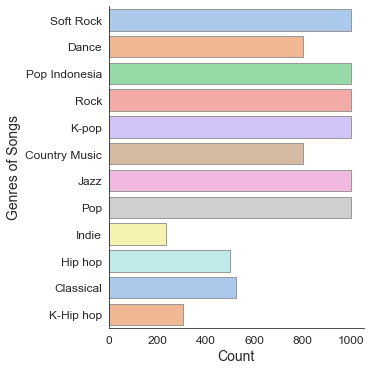

In [95]:
#Catplot
#It gives count of genre in spotify top 50 list. 
sns.catplot(y = "genres", kind = "count",
            palette = "pastel", edgecolor = ".6",
            data = df)
plt.xlabel("Count")
plt.ylabel("Genres of Songs")
plt.show()

In [96]:
top10_genres = df.sort_values('popularity', ascending=False)

fig = px.bar(top10_genres, x='genres', y=['valence', 'energy', 'danceability', 'acousticness'])
fig.show()

In [99]:
df.genres.value_counts()

Pop              1002
Jazz             1000
Soft Rock        1000
Pop Indonesia    1000
K-pop            1000
Rock             1000
Dance             800
Country Music     800
Classical         524
Hip hop           500
K-Hip hop         307
Indie             236
Name: genres, dtype: int64

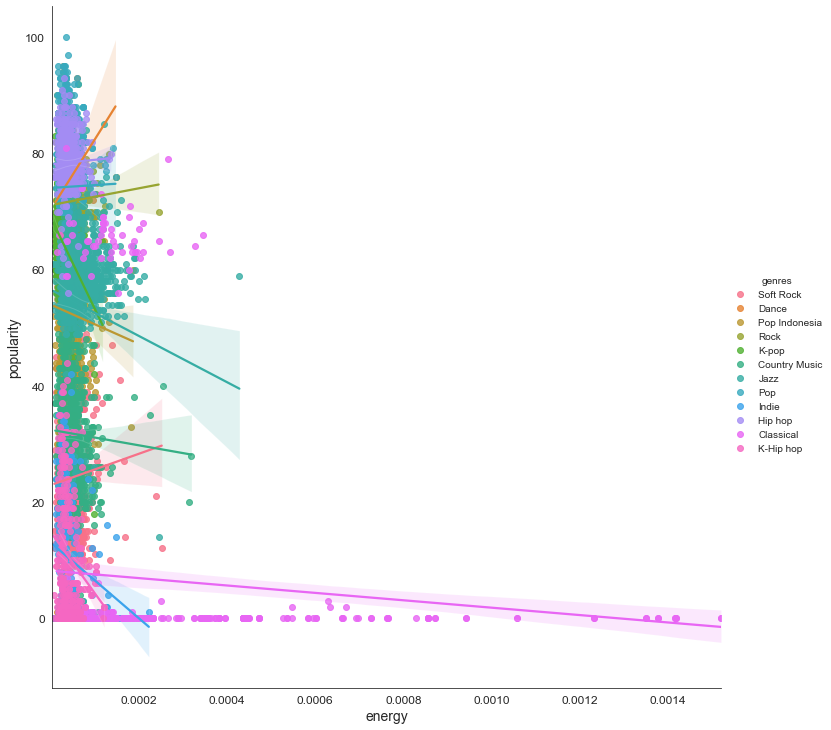

In [107]:
sns.lmplot(x="energy",y="popularity",data=df,size=10,hue="genres")
plt.show()
#this graph is so attractive because of different from other. My target in there is to show to Excellence of connection of Energy and Poularity  

In [110]:
from bokeh.plotting import figure, output_notebook, show
#Create stacked horizontal bar (via barh accessor):
p_stacked_hbar = df.plot_bokeh.barh(
    x="genres",
    stacked=True,
    xlabel="Price per Unit [€]",
    title="Fruit prices per Year",
    alpha=0.6,
    legend = "bottom_right",
    show_figure=False)
show(p_stacked_hbar)

In [37]:
import pandas as pd
import plotly.express as px

df_ = pd.DataFrame({'category': ['Apple', 'Pear', 'Banana', 'Orange', 'Cherry'],
                   'value': [1, 1, 3, 2, 0],
                  'mark': ['Average', 'Average', 'Terrible', 'Bad', 'Good']})

# need order of categoricals...
cat = ['Good', 'Average', 'Bad', 'Terrible']

# output radial as an ordered number
df2 = df.assign(mark=pd.Categorical(df["mark"], ordered=True, categories=cat).codes).sort_values(by= 'category')
fig = px.line_polar(df2, theta= 'category', r= 'mark').update_traces(fill='toself')

# change axis back to text
fig.update_layout(polar={"radialaxis":{"tickmode":"array","tickvals":[i for i in range(len(cat))],"ticktext":cat}})

fig

In [39]:
df_

category  value      mark
0    Apple      1   Average
1     Pear      1   Average
2   Banana      3  Terrible
3   Orange      2       Bad
4   Cherry      0      Good

In [127]:
df1 = df[['artist_name', 'track_name', 'popularity', 'label']]
df1 = df1.rename(columns={"artist_name" : "Artist", "track_name":"Title songs", "popularity":"Popularity"})

In [130]:
df1 = df1.reset_index()
df1 = df1.drop(['index'], axis=1)
df1.to_csv("clean_song.csv")

In [131]:
df1

Artist            Title songs  Popularity  label
0        Sammy Hagar  Rock 'N' Roll Weekend          18      0
1           Flo Rida           Good Feeling          77      0
2      Endah N Rhesa  When You Love Someone          61      2
3     Mumford & Sons        Little Lion Man          71      4
4             Sum 41                Fat Lip          74      0
...              ...                    ...         ...    ...
9164           Rossa   Jangan Hilangkan Dia          61      2
9165         Ava Max     My Head & My Heart          82      4
9166   Sleepy Hallow                   2055          87      0
9167      Bruno Mars                  Skate          79      0
9168              CL                  SPICY          62      0

[9169 rows x 4 columns]

In [133]:
df1['Title songs'].duplicated().sum()

1961

In [134]:
df1['Title songs'] = df1['Title songs'].drop_duplicates()

In [137]:
df1.dropna(axis=0, inplace=True)

In [139]:
df1 = df1.reset_index()
df1 = df1.drop(['index'], axis=1)
df1.to_csv('clean_final_song.csv')

In [6]:
data

Unnamed: 0     artist_name             track_name  \
0           3415     Sammy Hagar  Rock 'N' Roll Weekend   
1           6749        Flo Rida           Good Feeling   
2           5615   Endah N Rhesa  When You Love Someone   
3           2261  Mumford & Sons        Little Lion Man   
4           2736          Sum 41                Fat Lip   
...          ...             ...                    ...   
9164        5980           Rossa   Jangan Hilangkan Dia   
9165        6452         Ava Max     My Head & My Heart   
9166        7070   Sleepy Hallow                   2055   
9167        1482      Bruno Mars                  Skate   
9168         879              CL                  SPICY   

                    track_id  popularity  danceability    energy  key  \
0     32fyJa7mlop2S7uvaMtnst          18      0.000046  0.000047    9   
1     2LEF1A8DOZ9wRYikWgVlZ8          77      0.000021  0.000021    1   
2     2XWsariqeTCH61B53r8yA3          61      0.000038  0.000037    2   
3     6JnufVNLIO5F5Lk4sEVLeI          71      0.000036  0.000035    5   
4     4KacUpvbA3Mfo05gttTjhN          74      0.000032  0.000034    9   
...                      ...         ...           ...       ...  ...   
9164  2iohTvlcBjbzJ8gddFOTqi          61      0.000025  0.000024    7   
9165  1KixkQVDUHggZMU9dUobgm          82      0.000025  0.000027    9   
9166  4XvcHTUfIlWfyJTRG0aqlo          87      0.000054  0.000051    6   
9167  2sXf2JdbB2GlNju00kw9WE          79      0.000045  0.000044    5   
9168  0KGn1PDH5cqmD4B8GMVfae          62      0.000040  0.000041    6   

      loudness  mode  ...     tempo            type  \
0          0.0     1  ...  0.000785  audio_features   
1          0.0     0  ...  0.000534  audio_features   
2          0.0     1  ...  0.000588  audio_features   
3          0.0     1  ...  0.000594  audio_features   
4          0.0     1  ...  0.001132  audio_features   
...        ...   ...  ...       ...             ...   
9164       0.0     1  ...  0.000298  audio_features   
9165       0.0     0  ...  0.000685  audio_features   
9166       0.0     0  ...  0.000697  audio_features   
9167       0.0     1  ...  0.000593  audio_features   
9168       0.0     0  ...  0.000956  audio_features   

                                       uri  \
0     spotify:track:32fyJa7mlop2S7uvaMtnst   
1     spotify:track:2LEF1A8DOZ9wRYikWgVlZ8   
2     spotify:track:2XWsariqeTCH61B53r8yA3   
3     spotify:track:6JnufVNLIO5F5Lk4sEVLeI   
4     spotify:track:4KacUpvbA3Mfo05gttTjhN   
...                                    ...   
9164  spotify:track:2iohTvlcBjbzJ8gddFOTqi   
9165  spotify:track:1KixkQVDUHggZMU9dUobgm   
9166  spotify:track:4XvcHTUfIlWfyJTRG0aqlo   
9167  spotify:track:2sXf2JdbB2GlNju00kw9WE   
9168  spotify:track:0KGn1PDH5cqmD4B8GMVfae   

                                             track_href  \
0     https://api.spotify.com/v1/tracks/32fyJa7mlop2...   
1     https://api.spotify.com/v1/tracks/2LEF1A8DOZ9w...   
2     https://api.spotify.com/v1/tracks/2XWsariqeTCH...   
3     https://api.spotify.com/v1/tracks/6JnufVNLIO5F...   
4     https://api.spotify.com/v1/tracks/4KacUpvbA3Mf...   
...                                                 ...   
9164  https://api.spotify.com/v1/tracks/2iohTvlcBjbz...   
9165  https://api.spotify.com/v1/tracks/1KixkQVDUHgg...   
9166  https://api.spotify.com/v1/tracks/4XvcHTUfIlWf...   
9167  https://api.spotify.com/v1/tracks/2sXf2JdbB2Gl...   
9168  https://api.spotify.com/v1/tracks/0KGn1PDH5cqm...   

                                           analysis_url  duration_ms  \
0     https://api.spotify.com/v1/audio-analysis/32fy...          1.0   
1     https://api.spotify.com/v1/audio-analysis/2LEF...          1.0   
2     https://api.spotify.com/v1/audio-analysis/2XWs...          1.0   
3     https://api.spotify.com/v1/audio-analysis/6Jnu...          1.0   
4     https://api.spotify.com/v1/audio-analysis/4Kac...          1.0   
...                                                 ...          

In [40]:
import pandas as pd

data = pd.read_csv('result_final_project.csv')
data = data.drop(['Unnamed: 0'], axis=1)

In [42]:
data['track_name'].duplicated().sum()

1961

In [44]:
data = data.drop_duplicates()

In [45]:
data

artist_name             track_name                track_id  \
0        Sammy Hagar  Rock 'N' Roll Weekend  32fyJa7mlop2S7uvaMtnst   
1           Flo Rida           Good Feeling  2LEF1A8DOZ9wRYikWgVlZ8   
2      Endah N Rhesa  When You Love Someone  2XWsariqeTCH61B53r8yA3   
3     Mumford & Sons        Little Lion Man  6JnufVNLIO5F5Lk4sEVLeI   
4             Sum 41                Fat Lip  4KacUpvbA3Mfo05gttTjhN   
...              ...                    ...                     ...   
9164           Rossa   Jangan Hilangkan Dia  2iohTvlcBjbzJ8gddFOTqi   
9165         Ava Max     My Head & My Heart  1KixkQVDUHggZMU9dUobgm   
9166   Sleepy Hallow                   2055  4XvcHTUfIlWfyJTRG0aqlo   
9167      Bruno Mars                  Skate  2sXf2JdbB2GlNju00kw9WE   
9168              CL                  SPICY  0KGn1PDH5cqmD4B8GMVfae   

      popularity  danceability    energy  key  loudness  mode  speechiness  \
0             18      0.000046  0.000047    9       0.0     1     0.000042   
1             77      0.000021  0.000021    1       0.0     0     0.000018   
2             61      0.000038  0.000037    2       0.0     1     0.000036   
3             71      0.000036  0.000035    5       0.0     1     0.000034   
4             74      0.000032  0.000034    9       0.0     1     0.000030   
...          ...           ...       ...  ...       ...   ...          ...   
9164          61      0.000025  0.000024    7       0.0     1     0.000023   
9165          82      0.000025  0.000027    9       0.0     0     0.000022   
9166          87      0.000054  0.000051    6       0.0     0     0.000049   
9167          79      0.000045  0.000044    5       0.0     1     0.000041   
9168          62      0.000040  0.000041    6       0.0     0     0.000039   

      ...     tempo            type                                   uri  \
0     ...  0.000785  audio_features  spotify:track:32fyJa7mlop2S7uvaMtnst   
1     ...  0.000534  audio_features  spotify:track:2LEF1A8DOZ9wRYikWgVlZ8   
2     ...  0.000588  audio_features  spotify:track:2XWsariqeTCH61B53r8yA3   
3     ...  0.000594  audio_features  spotify:track:6JnufVNLIO5F5Lk4sEVLeI   
4     ...  0.001132  audio_features  spotify:track:4KacUpvbA3Mfo05gttTjhN   
...   ...       ...             ...                                   ...   
9164  ...  0.000298  audio_features  spotify:track:2iohTvlcBjbzJ8gddFOTqi   
9165  ...  0.000685  audio_features  spotify:track:1KixkQVDUHggZMU9dUobgm   
9166  ...  0.000697  audio_features  spotify:track:4XvcHTUfIlWfyJTRG0aqlo   
9167  ...  0.000593  audio_features  spotify:track:2sXf2JdbB2GlNju00kw9WE   
9168  ...  0.000956  audio_features  spotify:track:0KGn1PDH5cqmD4B8GMVfae   

                                             track_href  \
0     https://api.spotify.com/v1/tracks/32fyJa7mlop2...   
1     https://api.spotify.com/v1/tracks/2LEF1A8DOZ9w...   
2     https://api.spotify.com/v1/tracks/2XWsariqeTCH...   
3     https://api.spotify.com/v1/tracks/6JnufVNLIO5F...   
4     https://api.spotify.com/v1/tracks/4KacUpvbA3Mf...   
...                                                 ...   
9164  https://api.spotify.com/v1/tracks/2iohTvlcBjbz...   
9165  https://api.spotify.com/v1/tracks/1KixkQVDUHgg...   
9166  https://api.spotify.com/v1/tracks/4XvcHTUfIlWf...   
9167  https://api.spotify.com/v1/tracks/2sXf2JdbB2Gl...   
9168  https://api.spotify.com/v1/tracks/0KGn1PDH5cqm...   

                                           analysis_url duration_ms  \
0     https://api.spotify.com/v1/audio-analysis/32fy...         1.0   
1     https://api.spotify.com/v1/audio-analysis/2LEF...         1.0   
2     https://api.spotify.com/v1/audio-analysis/2XWs...         1.0   
3     https://api.spotify.com/v1/audio-analysis/6Jnu...         1.0   
4     https://api.spotify.com/v1/audio-analysis/4Kac...         1.0   
...                                                 ...         ...   
9164  https://api.spotify.com/v1/audio-analysis/2ioh...         1.0   
9165  https://api

In [46]:
data = data.reset_index()
data = data.drop(['index'], axis=1)

In [48]:
data.to_csv('result_songs_clean.csv')